# **Road Accident Severity Classification**


## Description of Dataset:

This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms. 

## Problem Statement: 
The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. Your metric for evaluation will be f1-score


## Libraries

In [1]:
# for data wrangling
import numpy as np
import pandas as pd



# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing
from sklearn.preprocessing import StandardScaler


# for statistics and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import roc_auc_score
 

# for classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree

#for sampling

from collections import Counter
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import RandomOverSampler




## Reading and understanding the data

In [2]:
rta=pd.read_csv('/content/Road Traffic Accidents Dataset.csv')
rta.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Summarized information of columns in Dataset

In [3]:
print(f"RTA Dataset has {rta.shape[0]} occurences and {rta.shape[1]} features!")

RTA Dataset has 12316 occurences and 32 features!


In [ ]:
print("The features of RTA Dataset are:")

features = len(rta.columns)
features_list = [feature for feature in rta.columns]

for feature in features_list:
    print(feature)

The features of RTA Dataset are:
Time
Day_of_week
Age_band_of_driver
Sex_of_driver
Educational_level
Vehicle_driver_relation
Driving_experience
Type_of_vehicle
Owner_of_vehicle
Service_year_of_vehicle
Defect_of_vehicle
Area_accident_occured
Lanes_or_Medians
Road_allignment
Types_of_Junction
Road_surface_type
Road_surface_conditions
Light_conditions
Weather_conditions
Type_of_collision
Number_of_vehicles_involved
Number_of_casualties
Vehicle_movement
Casualty_class
Sex_of_casualty
Age_band_of_casualty
Casualty_severity
Work_of_casuality
Fitness_of_casuality
Pedestrian_movement
Cause_of_accident
Accident_severity


In [ ]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
rta.describe(include=['O']).T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


In [ ]:
rta.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Inference: 

* As per Information of feature values and data visibility, 16 columns has null values and the rest 15 too may have some 'unknown' values.
* From the entire features list only two columns are of numerical category and rest all are of categorical/string category.



##**EDA**

## Grouping the features

###Date&Time

In [ ]:
rta['Time'].value_counts()

15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
19:04:00      1
20:36:00      1
22:54:00      1
21:03:00      1
2:47:00       1
Name: Time, Length: 1074, dtype: int64

Convert 'Time' column from string <HH:MM:SS> to "Day"/"Night"

In [ ]:

def formatTimeCol(t):
    t = t[:2]
    if ":" in t:
        t = t[:1]
        
    return int(t)

def categorizeTimeCol(t):
    if t >= 8 and t< 17:
        return "Day"
    else:
        return "Night"


rta['Time'] = rta['Time'].apply(lambda x: formatTimeCol(x))
rta['Time'] = rta['Time'].apply(lambda x: categorizeTimeCol(x))

rta['Time'].value_counts(dropna=False)


Day      6387
Night    5929
Name: Time, dtype: int64

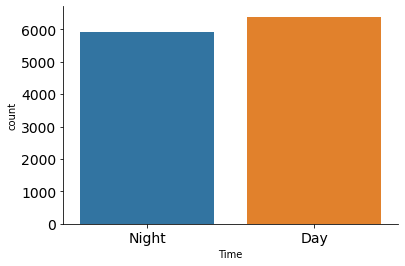

In [ ]:
sns.countplot(x=rta["Time"])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)


In [ ]:
rta['Day_of_week'].value_counts()

Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64

In [ ]:
# Extracting hour from timestamp.

#rta['hour'] = pd.to_datetime(rta['Time']).dt.hour

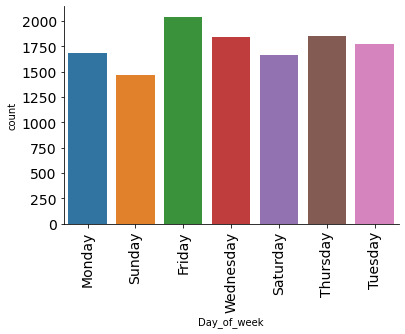

In [ ]:
cp=sns.countplot(x=rta["Day_of_week"])

plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)


Inference on Time:

* Most of the accidents Occured on Friday
* Occured at Day time 8AM and 5PM(office & school hours)
* Sunday has less number of accidents

###Driver

In [ ]:
rta['Age_band_of_driver'].value_counts()

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64

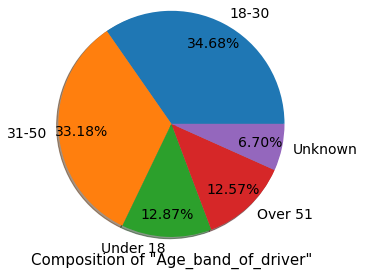

In [ ]:
fig_1=plt.pie(x=rta['Age_band_of_driver'].value_counts(),
        labels=list(rta['Age_band_of_driver'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.xlabel('Composition of "Age_band_of_driver"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [ ]:
rta['Sex_of_driver'].value_counts()
#to drop

Male       11437
Female       701
Unknown      178
Name: Sex_of_driver, dtype: int64

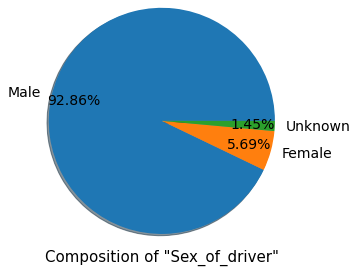

In [ ]:
plt.pie(x=rta['Sex_of_driver'].value_counts(),
        labels=list(rta['Sex_of_driver'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.xlabel('Composition of "Sex_of_driver"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [ ]:
rta['Educational_level'].value_counts()

Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64

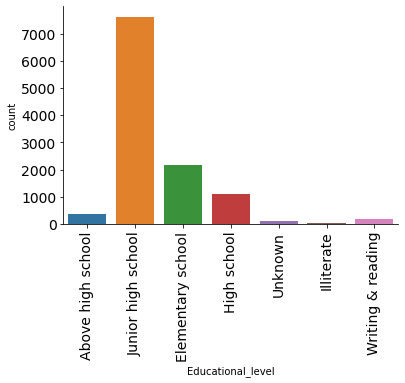

In [ ]:
cp = sns.countplot(x=rta["Educational_level"])

plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)


In [ ]:
print('Vehicle driver relations are like:')
rta['Vehicle_driver_relation'].value_counts()

Vehicle driver relations are like:


Employee    9627
Owner       1973
Other        123
Unknown       14
Name: Vehicle_driver_relation, dtype: int64

In [ ]:
rta['Driving_experience'].value_counts()

5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: Driving_experience, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


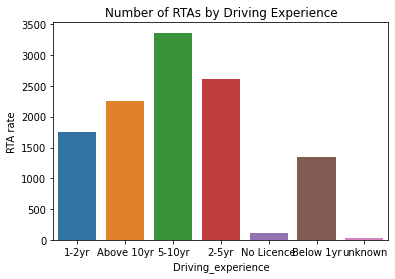

In [ ]:
sns.countplot(rta['Driving_experience'])
plt.xlabel("Driving_experience")
plt.ylabel("RTA rate")
plt.title("Number of RTAs by Driving Experience")
plt.show()

In [ ]:
rta['Owner_of_vehicle'].value_counts()

Owner           10459
Governmental     1041
Organization      312
Other              22
Name: Owner_of_vehicle, dtype: int64

Inference on Driver's features:

* Most of the drivers are male between 18-30 age group and with 5-10 yrs of driving experience.
* **Number of RTAs by Gender of Drivers:-** In terms of gender, male drivers have been the main cause of traffic accidents by taking
88% of accidents. However, in the current data collection or data gained from the Addis
Ababa Traffic Police Commission data, there is no information on the number of vehicles
driven by males and females in Addis Ababa.
* Majority of the drivers who got accident are employees.
* **Number of RTAs by the Driving Experience of the Driver:-** From this, it can be seen that experienced drivers are not only experienced in high-risk
accidents but also in terms of human behavior. There are also reports of accidents involving
unlicensed drivers, who are in violation of the law and endanger lives and property.
* **Road RTAs by the Educational Level of Drivers:-** According to the data, the highest number of the accident reported at the junior high school educational level of drivers. In
this comparison, the risk of most drivers at this education level is related to the problems
we have seen in the age group. This does not mean that all drivers at this level of education
are in their teens, but they do take part.
* Most of the accidents occured in personally owned passenger vehicle.

###Vehicle

In [ ]:
rta['Type_of_vehicle'].value_counts()

Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: Type_of_vehicle, dtype: int64

In [ ]:
rta['Service_year_of_vehicle'].value_counts()

Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: Service_year_of_vehicle, dtype: int64

In [ ]:
rta['Defect_of_vehicle'].value_counts()

No defect    7777
7              76
5              36
Name: Defect_of_vehicle, dtype: int64

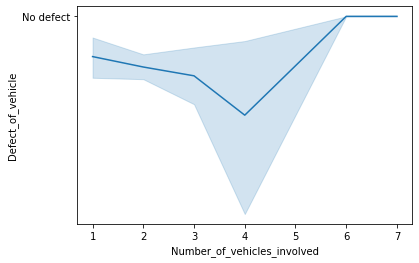

In [ ]:
sns.lineplot(data=rta,y='Defect_of_vehicle',x='Number_of_vehicles_involved')

Inference on vehicle features:
* Most of the vehicles dont have any defects. but still got accident
* 

###Accident Area

In [ ]:
rta['Area_accident_occured'].value_counts()
#edit

Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: Area_accident_occured, dtype: int64

In [ ]:
rta['Area_accident_occured'] = rta['Area_accident_occured'].str.strip()
rta['Area_accident_occured'].value_counts()

Other                              3819
Office areas                       3451
Residential areas                  2060
Church areas                       1060
Industrial areas                    456
School areas                        415
Recreational areas                  328
Outside rural areas                 218
Hospital areas                      121
Market areas                         63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Name: Area_accident_occured, dtype: int64

In [ ]:
rta['Types_of_Junction'].value_counts()

Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: Types_of_Junction, dtype: int64

Inference on Accident Area:
*  Majority of accidents occured in office areas rather than residential areas.
* Majority of accidents occured in Y type junction and least number of accidents in X type junction

###Road & Weather

In [ ]:
rta['Lanes_or_Medians'].value_counts()

Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: Lanes_or_Medians, dtype: int64

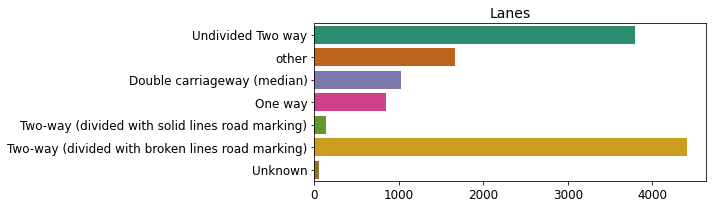

In [ ]:
# checking the Lanes column

plt.figure(figsize=(10,3))
sns.countplot(data=rta, y='Lanes_or_Medians', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [ ]:
rta['Road_allignment'].value_counts()

Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: Road_allignment, dtype: int64

In [ ]:
rta['Road_allignment'].replace('Tangent road with mountainous terrain and','Tangent road with mountainous terrain',inplace=True)
rta['Road_allignment'].value_counts()

Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain              396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: Road_allignment, dtype: int64

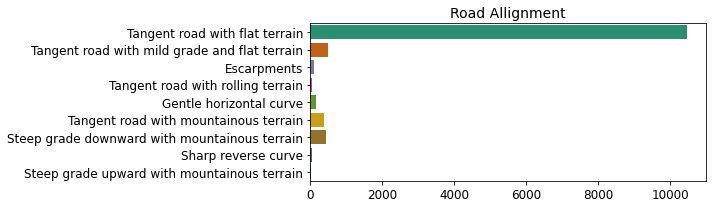

In [ ]:
# Checking the Road Allignment column

plt.figure(figsize=(10,3))
sns.countplot(data=rta, y='Road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [ ]:
rta['Road_surface_type'].value_counts()

Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: Road_surface_type, dtype: int64

In [ ]:
rta[ 'Road_surface_conditions'].value_counts()

Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: Road_surface_conditions, dtype: int64

In [ ]:
rta['Light_conditions'].value_counts()

Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: Light_conditions, dtype: int64

In [ ]:
rta['Weather_conditions'].value_counts()

Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: Weather_conditions, dtype: int64

Inference on Road features:
* Most of the accidents
Occured at two-way lines in dry surface road
* Majority of accidents occured in normal day light and in normal whether condition.

###Collision

In [ ]:
rta['Type_of_collision'].value_counts()

Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: Type_of_collision, dtype: int64

In [ ]:
rta['Number_of_vehicles_involved'].value_counts()

2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: Number_of_vehicles_involved, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


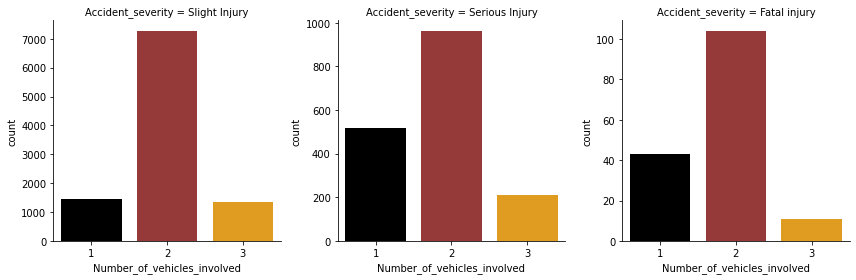

In [ ]:
# creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=rta, col='Accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

In [ ]:
rta['Vehicle_movement'].value_counts()

Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: Vehicle_movement, dtype: int64

Inference on Type of Collision:
* Majority of accidents occured in vehicle-vehicle collision.
* The number of vehicles involved is 2 in majority of accidents.
* Major cause of accident is not keeping sufficient  distance between vehicles and lane changing.

###Casuality


In [ ]:
rta['Number_of_casualties'].value_counts()

1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: Number_of_casualties, dtype: int64

In [ ]:
rta['Casualty_class'].value_counts()

Driver or rider    4944
na                 4443
Pedestrian         1649
Passenger          1280
Name: Casualty_class, dtype: int64

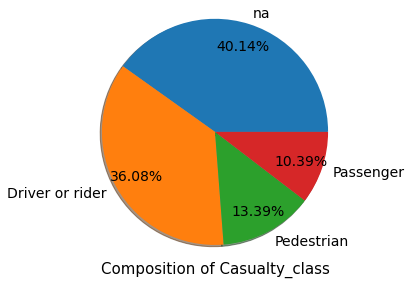

In [ ]:
plt.pie(x=rta['Casualty_class'].value_counts(),
        labels=list(rta['Casualty_class'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.xlabel('Composition of Casualty_class', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [ ]:
rta['Sex_of_casualty'].value_counts()

Male      5253
na        4443
Female    2620
Name: Sex_of_casualty, dtype: int64

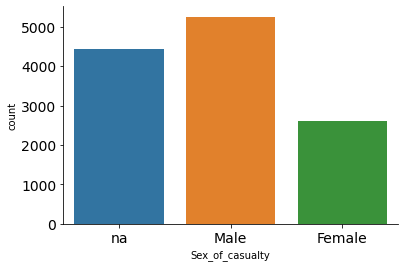

In [ ]:
cp = sns.countplot(x=rta["Sex_of_casualty"])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)


In [ ]:
rta['Age_band_of_casualty'].value_counts()

na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: Age_band_of_casualty, dtype: int64

The value 5 is may be a mistake. so wana remove it......

In [ ]:
rta['Age_band_of_casualty'].value_counts()

na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: Age_band_of_casualty, dtype: int64

In [ ]:
rta['Work_of_casuality'].value_counts()

Driver           5903
Self-employed    2044
Employee          553
Other             463
Student           103
Unemployed         33
Unknown            19
Name: Work_of_casuality, dtype: int64

In [ ]:
rta['Casualty_severity'].value_counts()

3     7076
na    4443
2      771
1       26
Name: Casualty_severity, dtype: int64

In [ ]:
rta['Fitness_of_casuality'].value_counts()

Normal          9608
NormalNormal      19
Deaf              18
Other             18
Blind             18
Name: Fitness_of_casuality, dtype: int64

In [3]:
rta['Fitness_of_casuality'].replace('NormalNormal','Normal',inplace=True)
rta['Fitness_of_casuality'].value_counts()

Normal    9627
Deaf        18
Other       18
Blind       18
Name: Fitness_of_casuality, dtype: int64

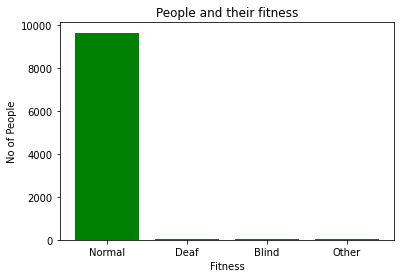

In [ ]:

## Visualization of 'Fitness_of_casuality' feature.
import seaborn as sns 
import matplotlib.pyplot as plt

data = rta['Fitness_of_casuality'].value_counts()
keys = ['Normal','Deaf','Blind','Other']

plt.bar(keys,data,color='green')
plt.xlabel("Fitness")
plt.ylabel("No of People")
plt.title("People and their fitness")
plt.show()

Inferences on Casuality details:
* Avg Casuality number is 1
* Severity range  of casuality is 3
* Age Range is 18-30
* Most of people are normally fit.only a few are deaf and blind.
* Male casuality is more compared to female casuality
* Major casuality is driver himself
* Pedestrians are also more
likely affected by the accident.


In [ ]:
rta['Pedestrian_movement'].value_counts()

Not a Pedestrian                                                                                                                         11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Unknown or other                                                                                                                           293
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                                               18

###Cause of accident

<ipython-input-66-f7f39b88c1ca>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


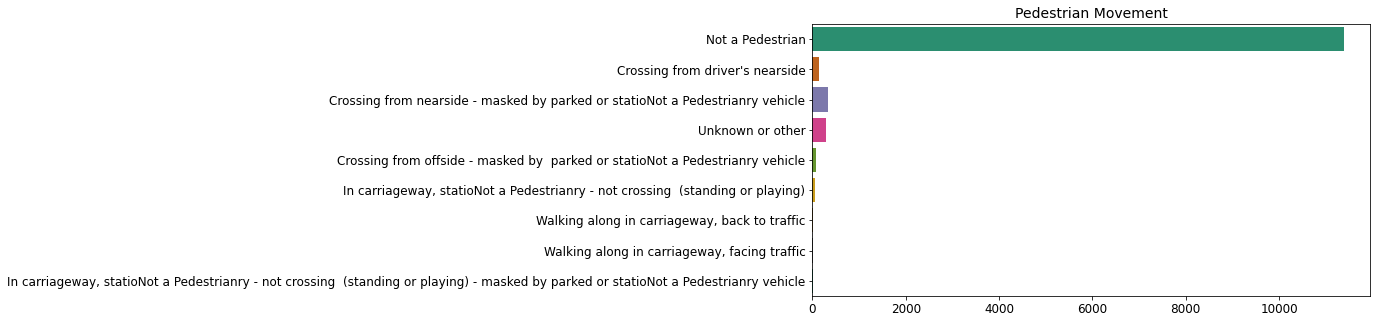

In [ ]:
# Checking the Pedestrian Movement column

plt.figure(figsize=(10,5))
sns.countplot(data=rta, y='Pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [ ]:
rta['Cause_of_accident'].value_counts()

No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: Cause_of_accident, dtype: int64

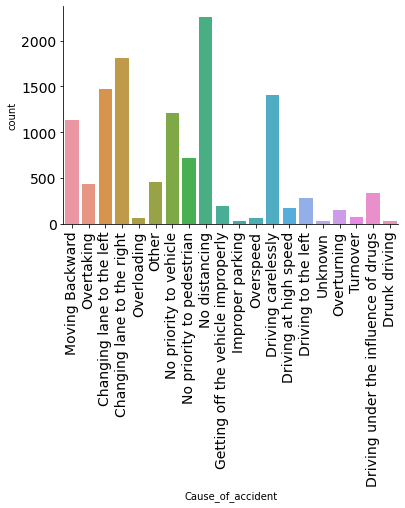

In [ ]:
cp = sns.countplot(x=rta["Cause_of_accident"])

plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)


Major cause of accident is not keeping sufficient distance between vehicles and lane changing.

## Target variable

In [ ]:
rta['Accident_severity'].value_counts()
#target

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

Inference:

So, the target variable has 3 occassions, where Slight Injury marks higher

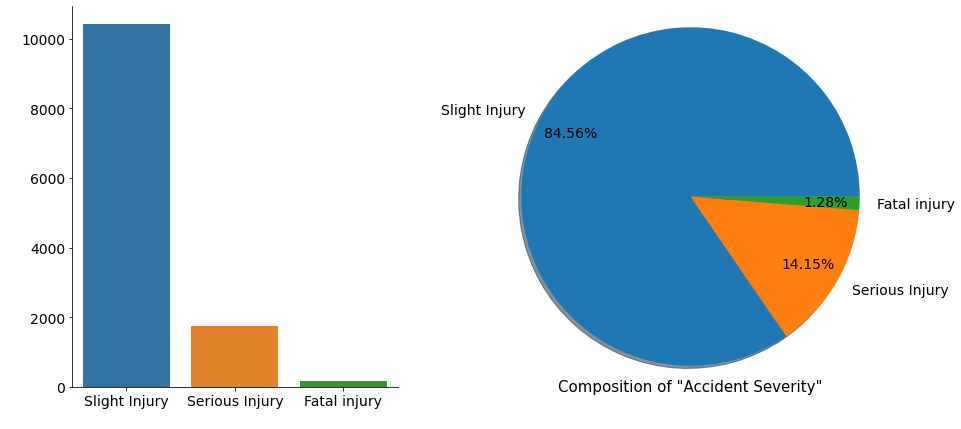

In [ ]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=rta["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

# pieplot
ax2= plt.subplot(1,2,2)
plt.pie(x=rta['Accident_severity'].value_counts(),
        labels=list(rta['Accident_severity'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

Inference:

1. 84% of accidents led to slight injuries.
2. There is large difference between Slight Injuries and Serious Injuries. 
3. Only 1.3% of people died in accidents. Instant deaths are less, most people survived with slight injuries and few survived with very serious injuries

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


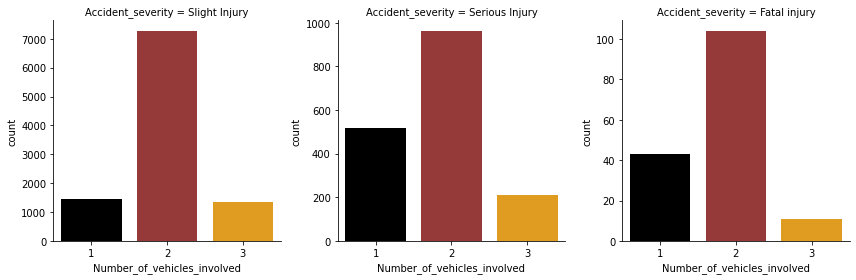

In [ ]:
# creating a facet grid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=rta, col='Accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


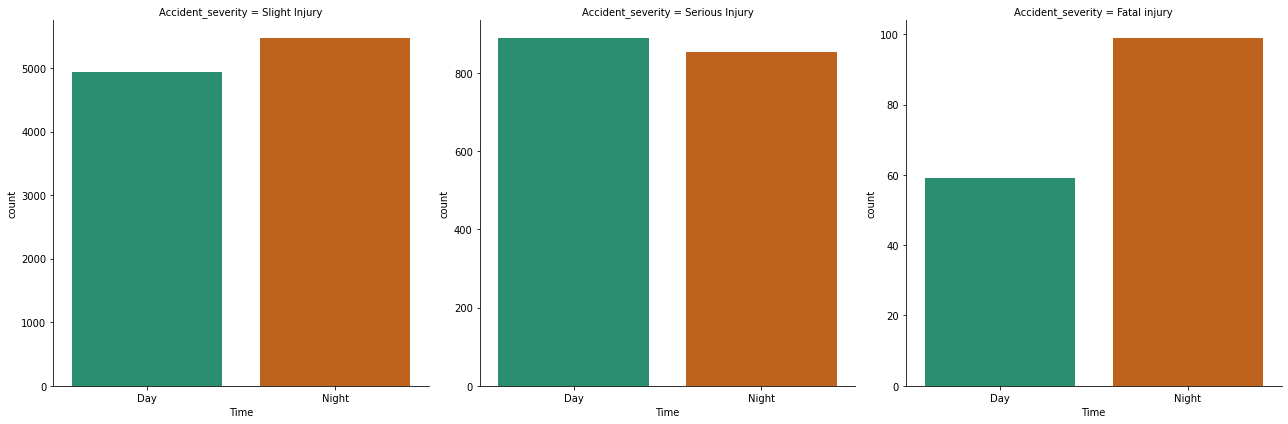

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


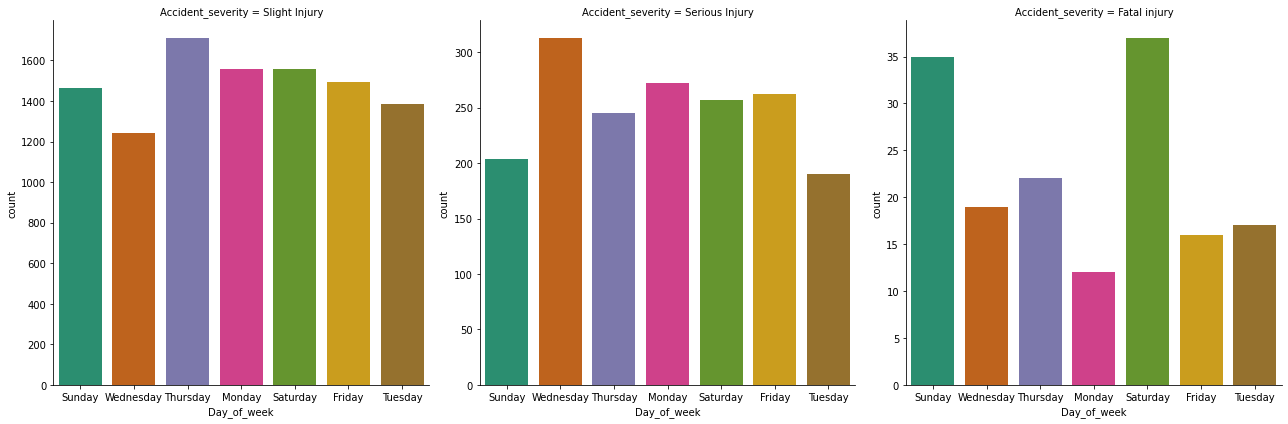

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


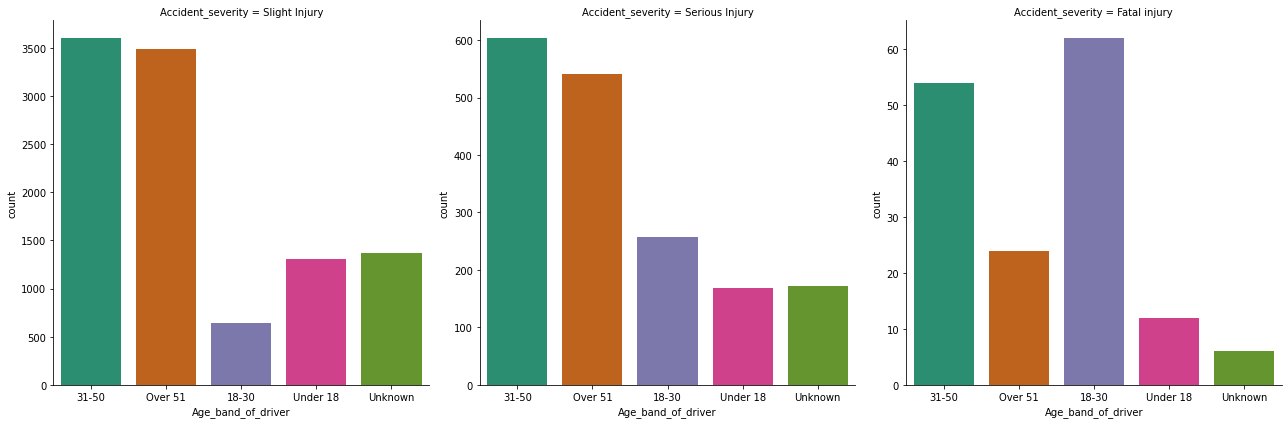

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


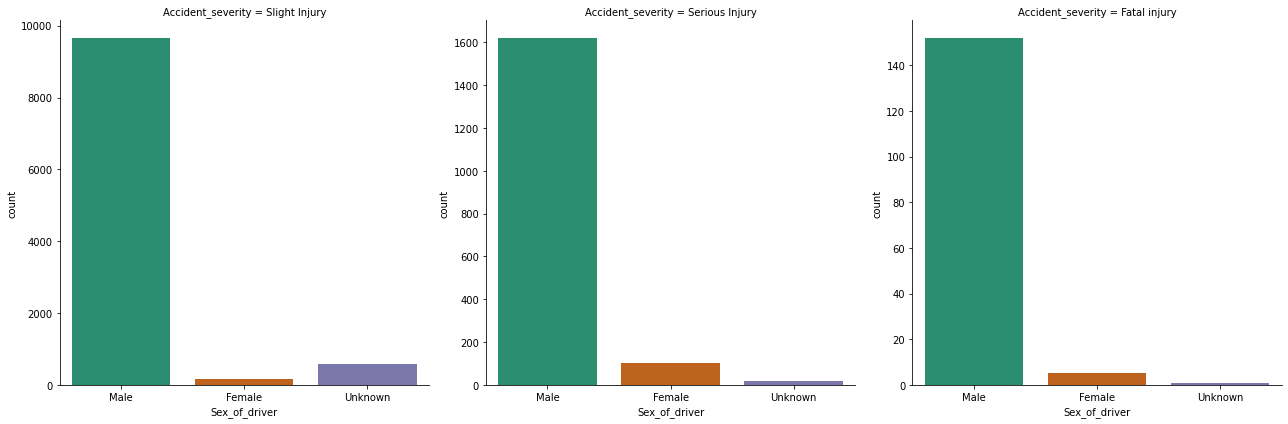

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


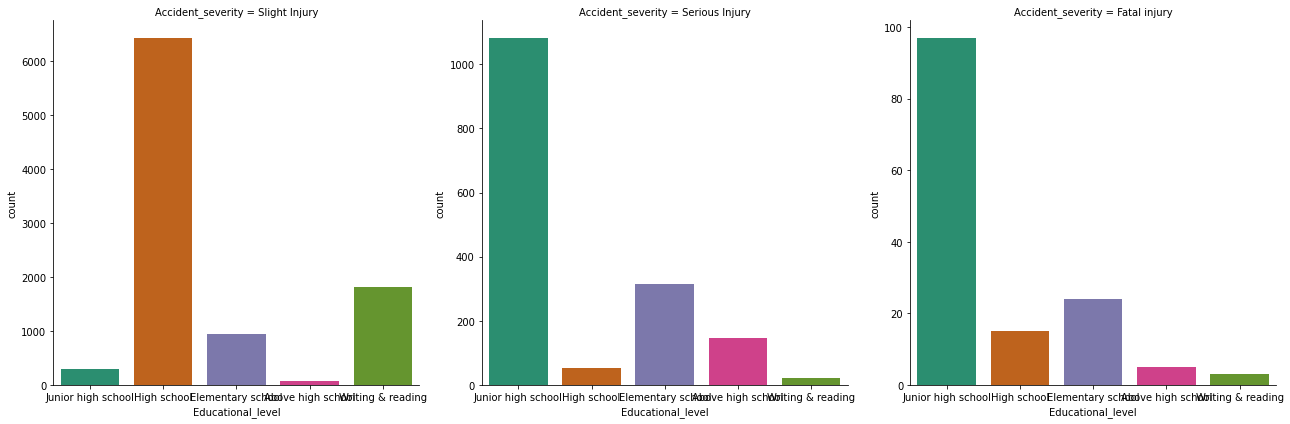

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


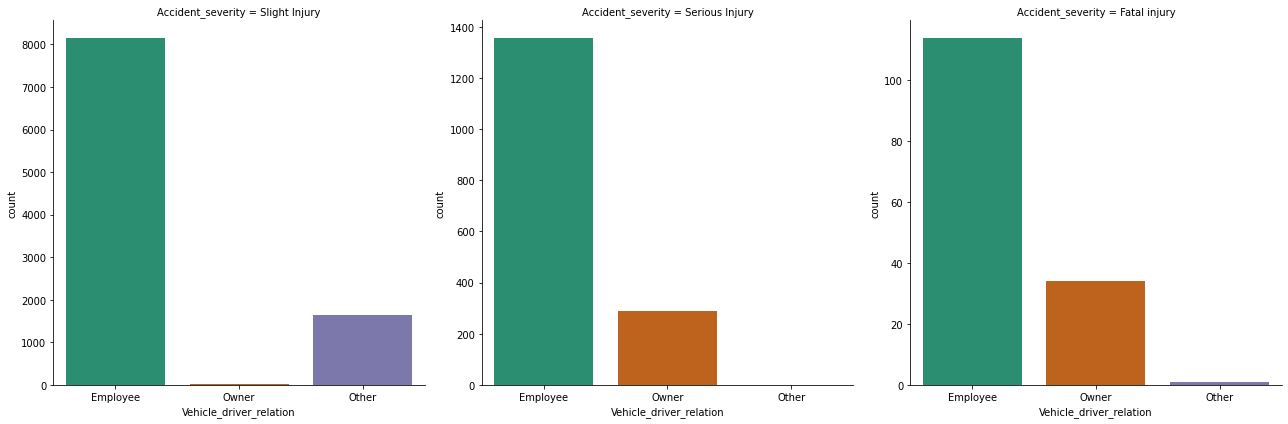

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


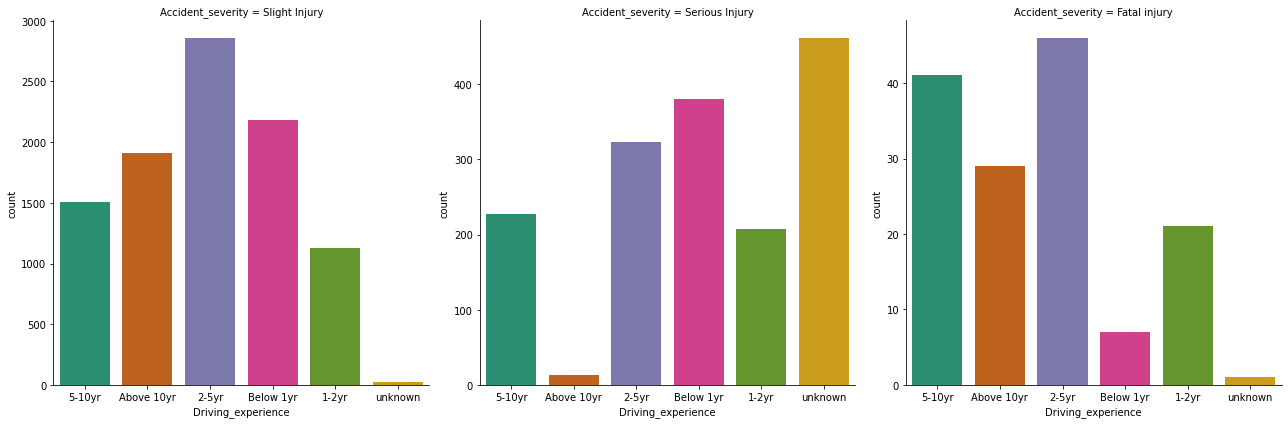

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


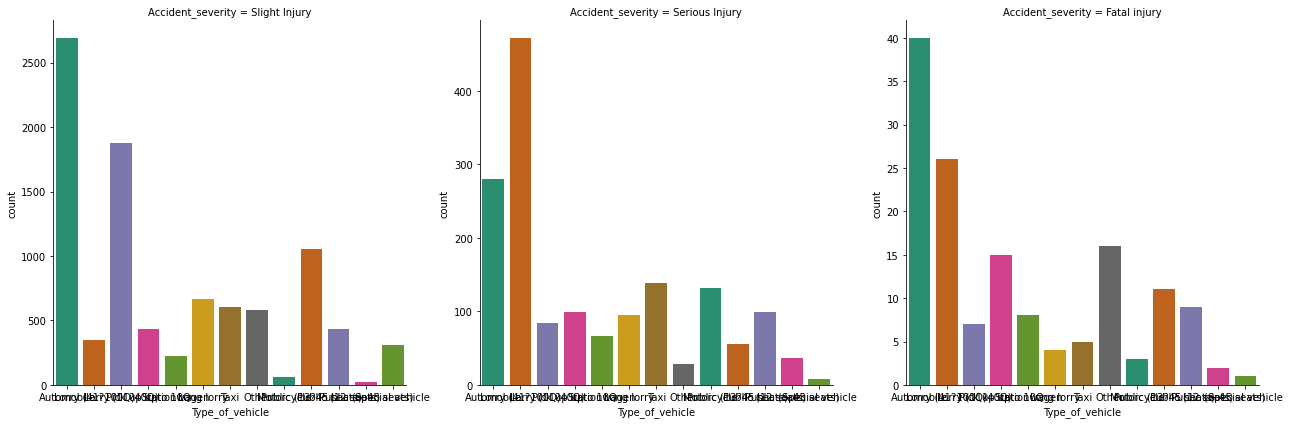

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


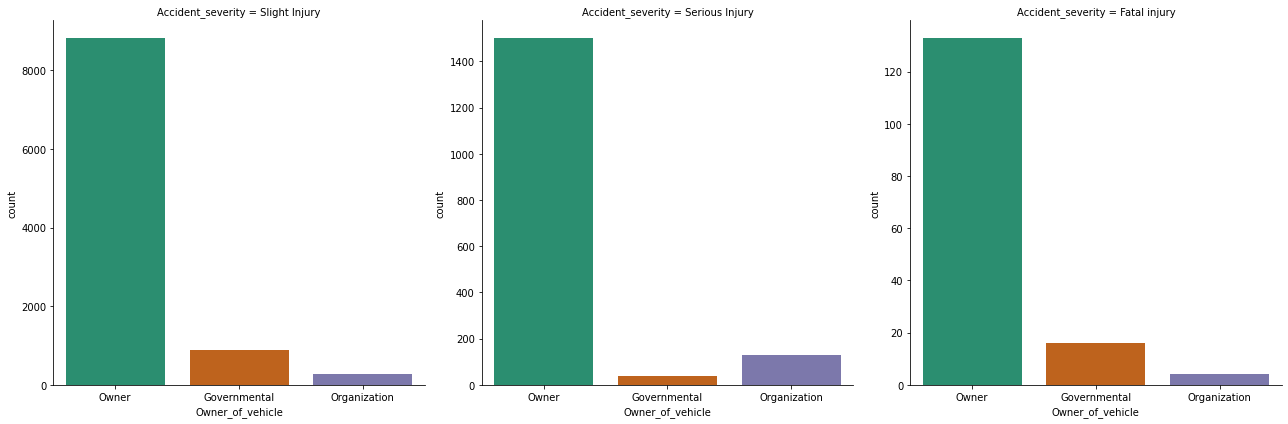

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


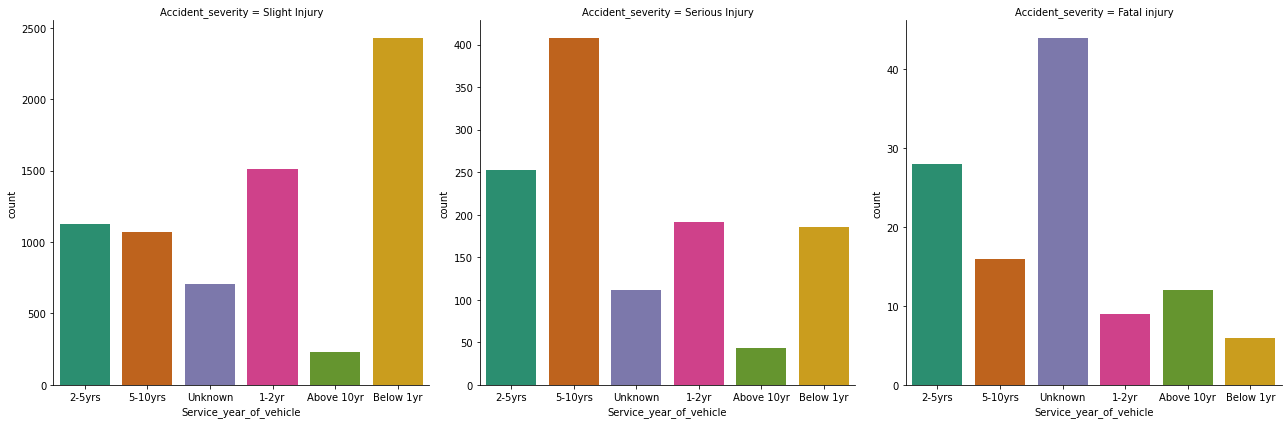

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


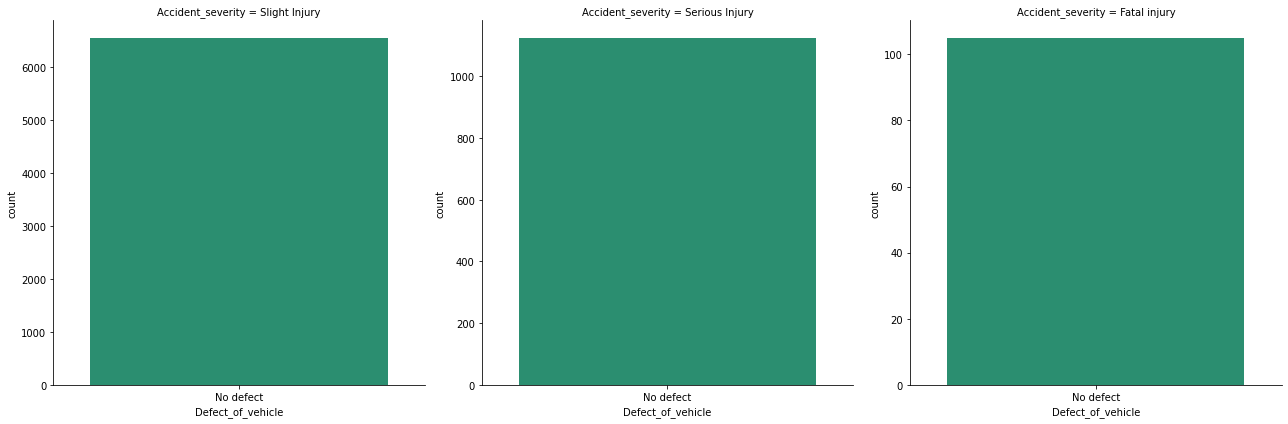

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


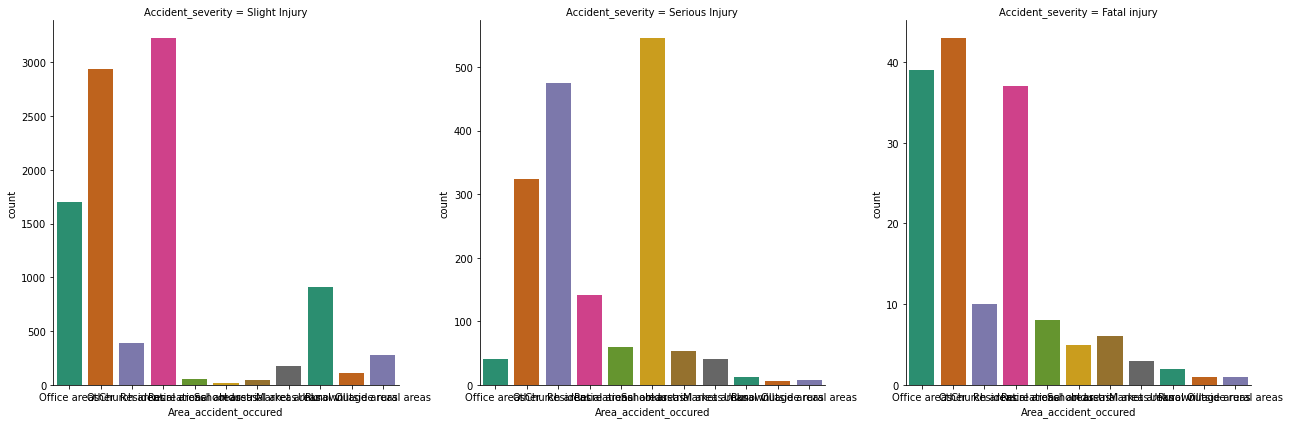

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


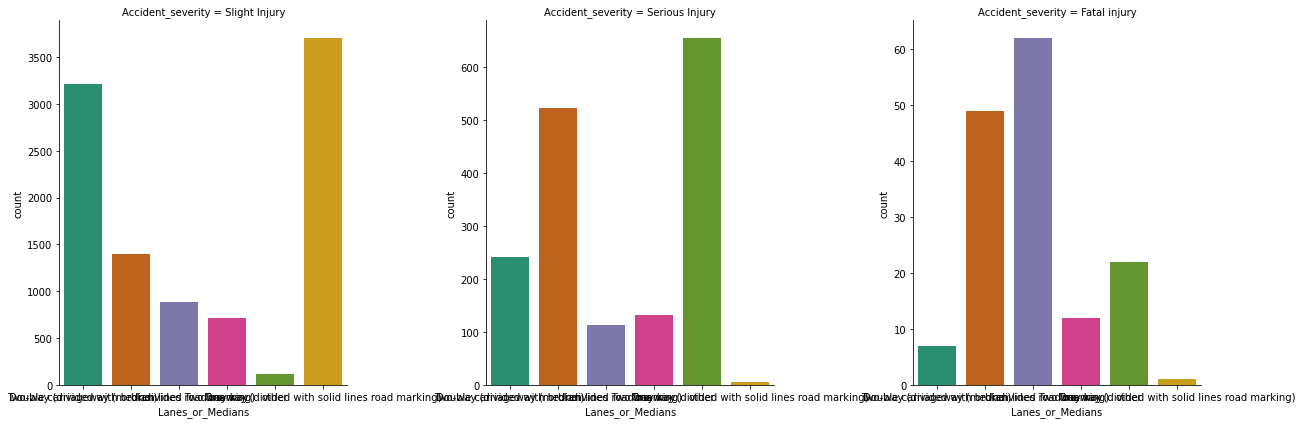

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


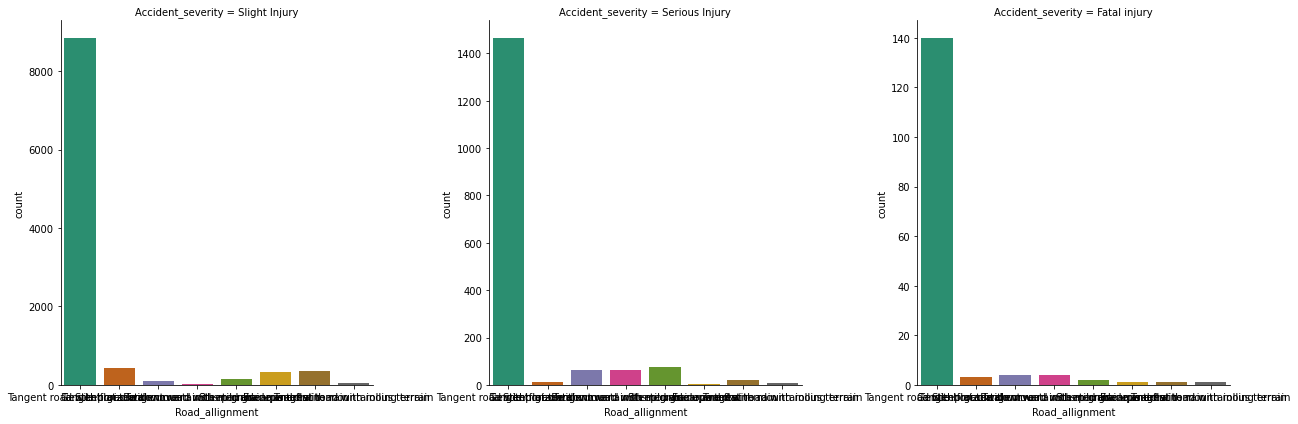

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


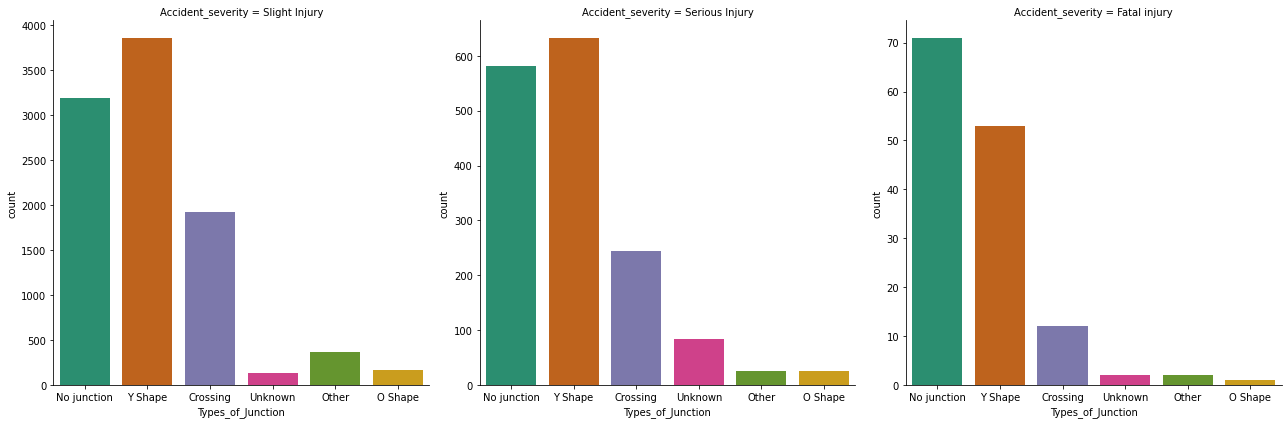

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


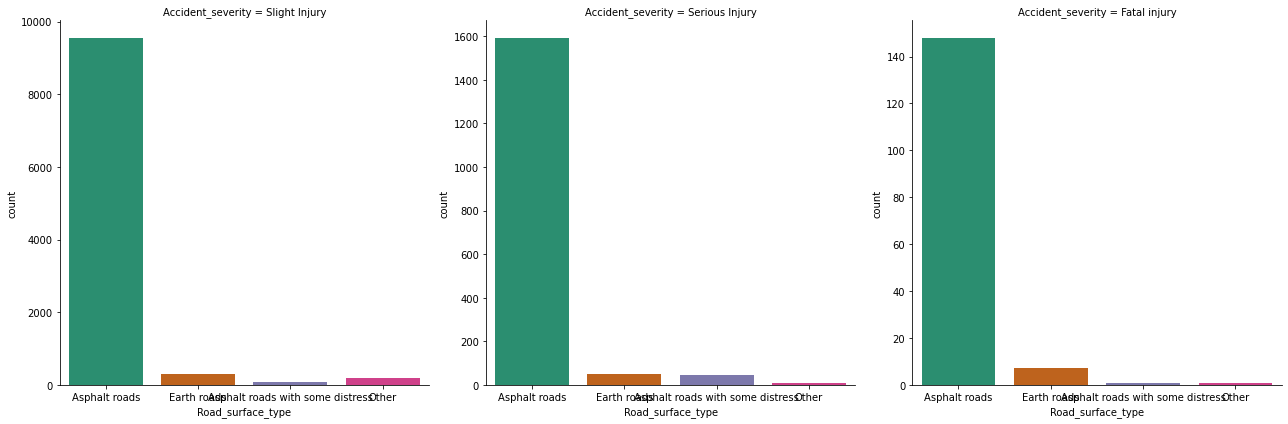

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


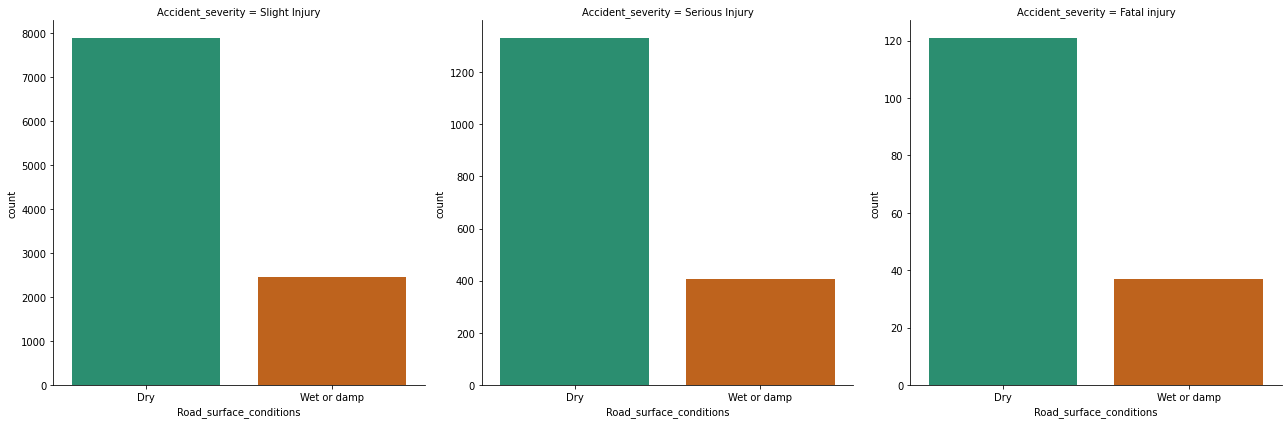

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


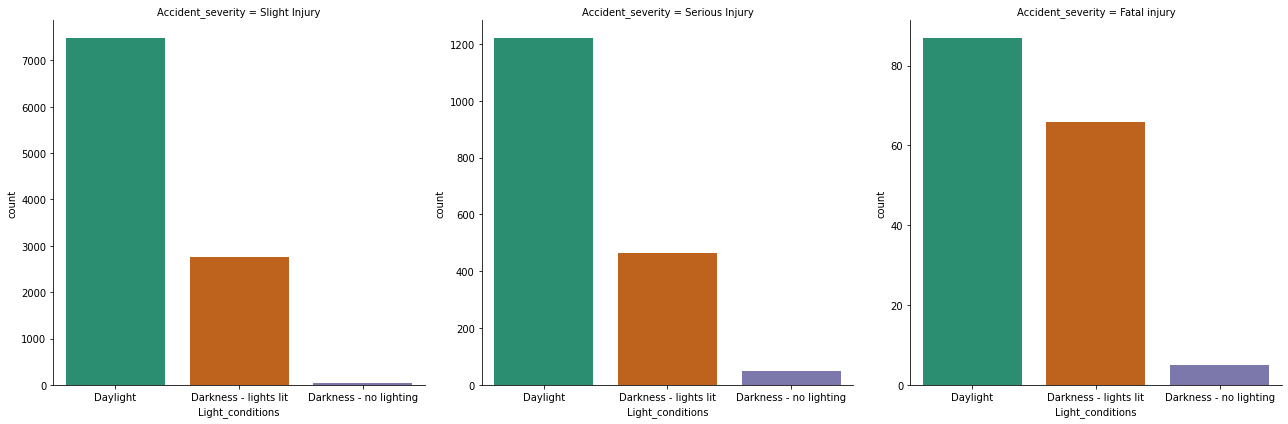

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


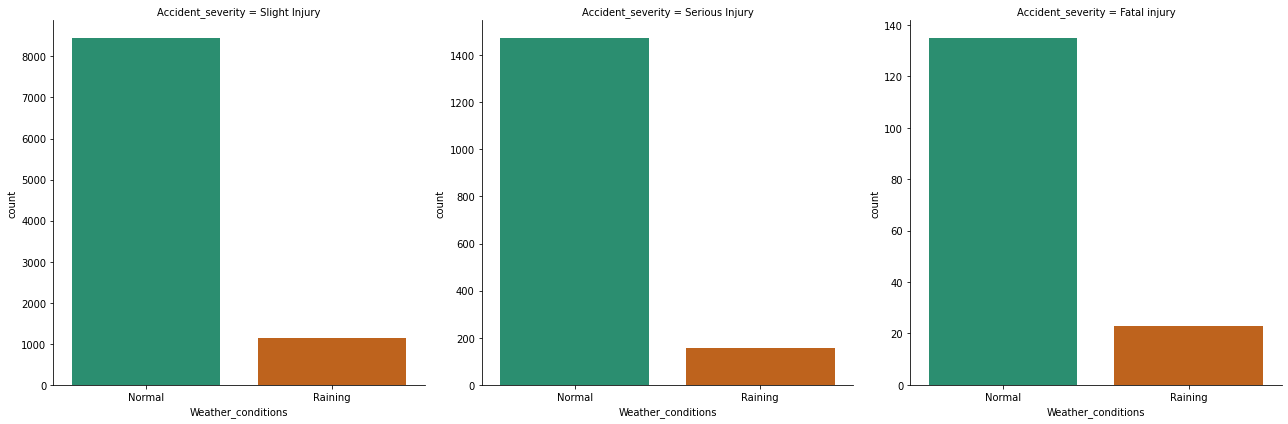

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


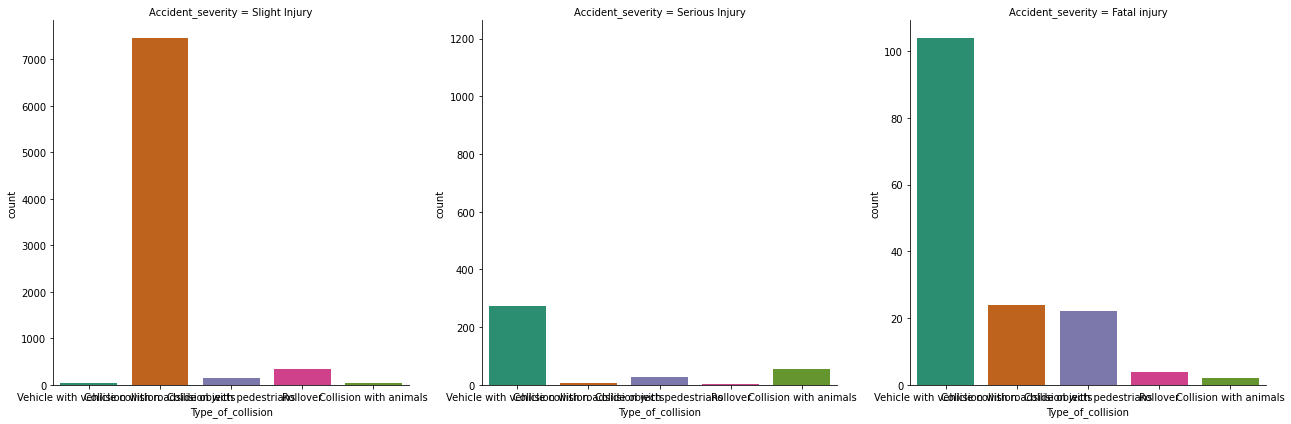

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


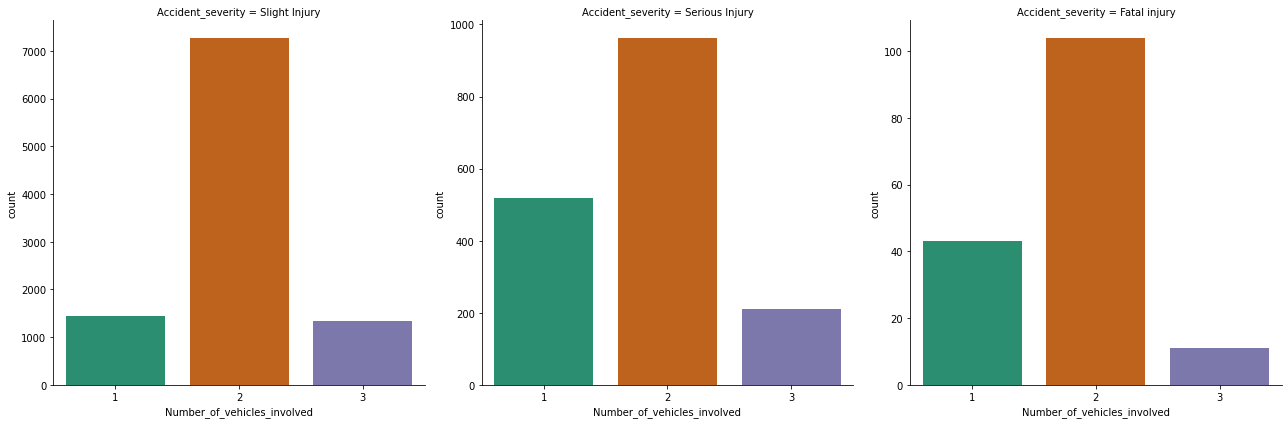

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


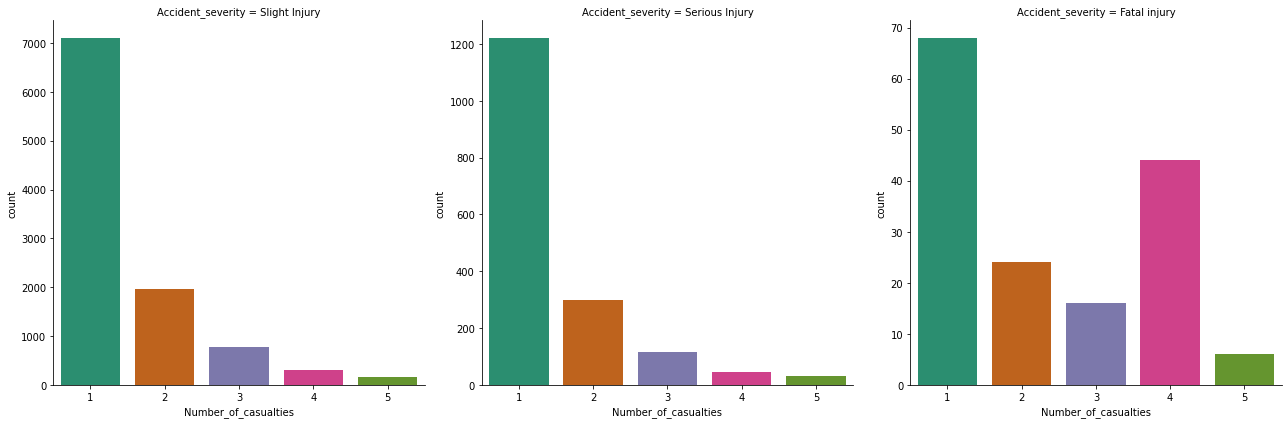

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


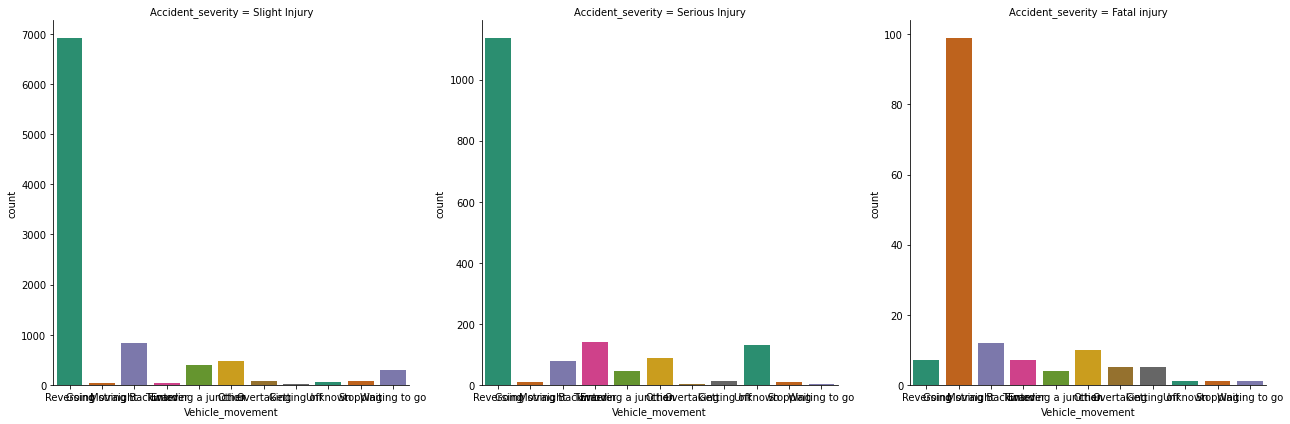

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


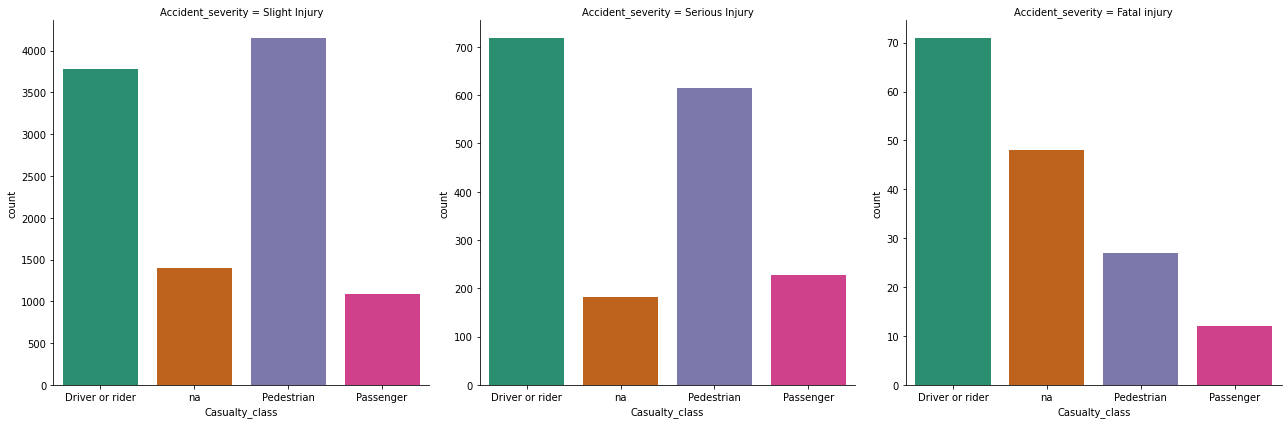

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


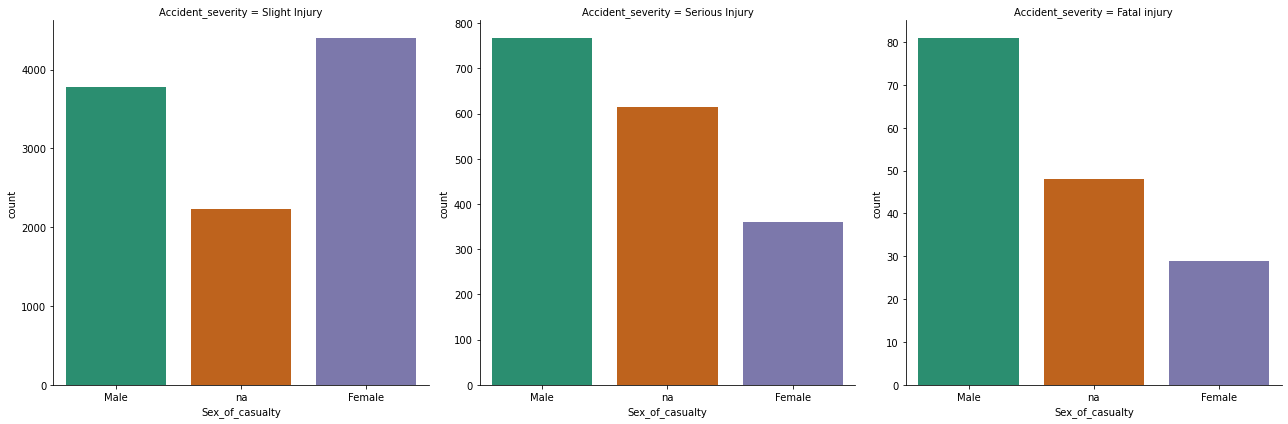

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


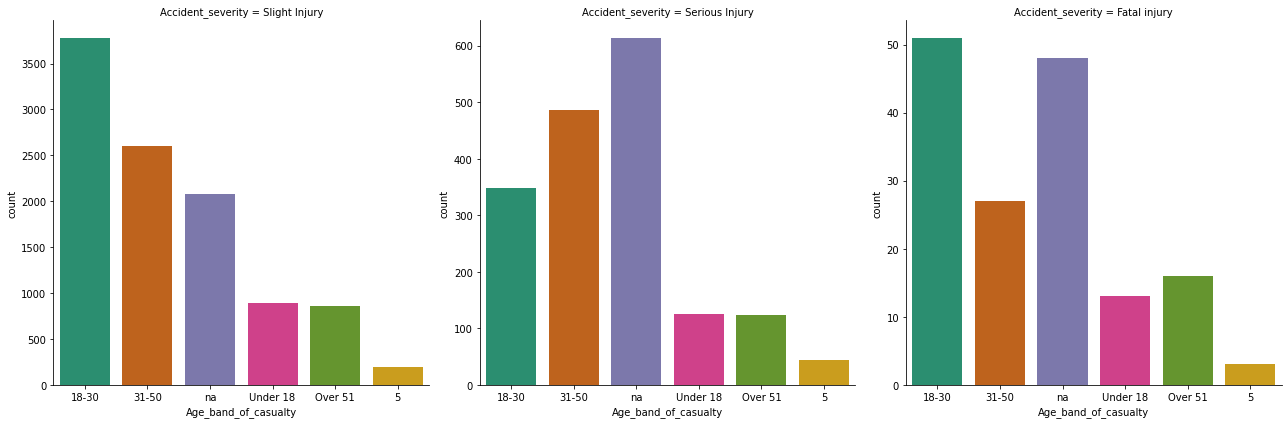

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


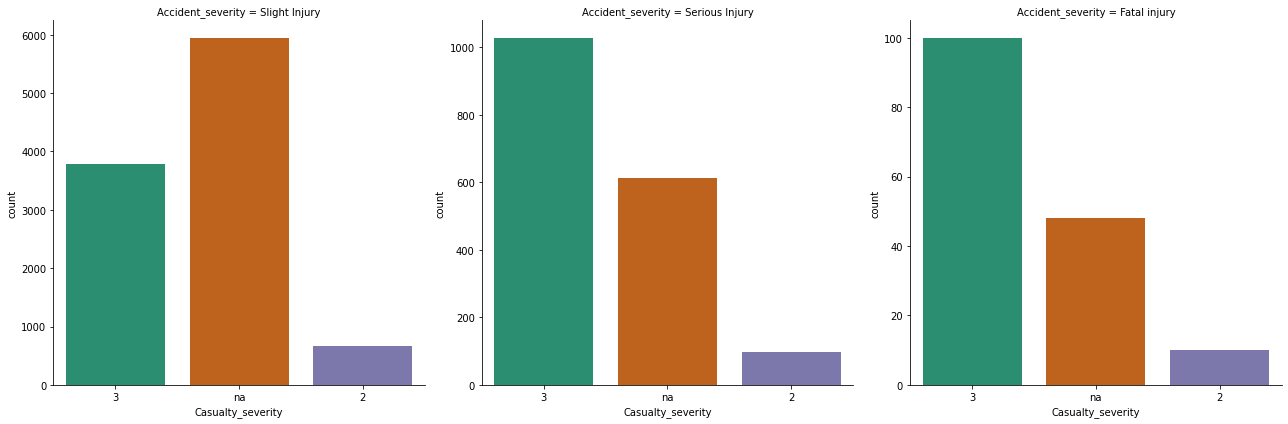

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


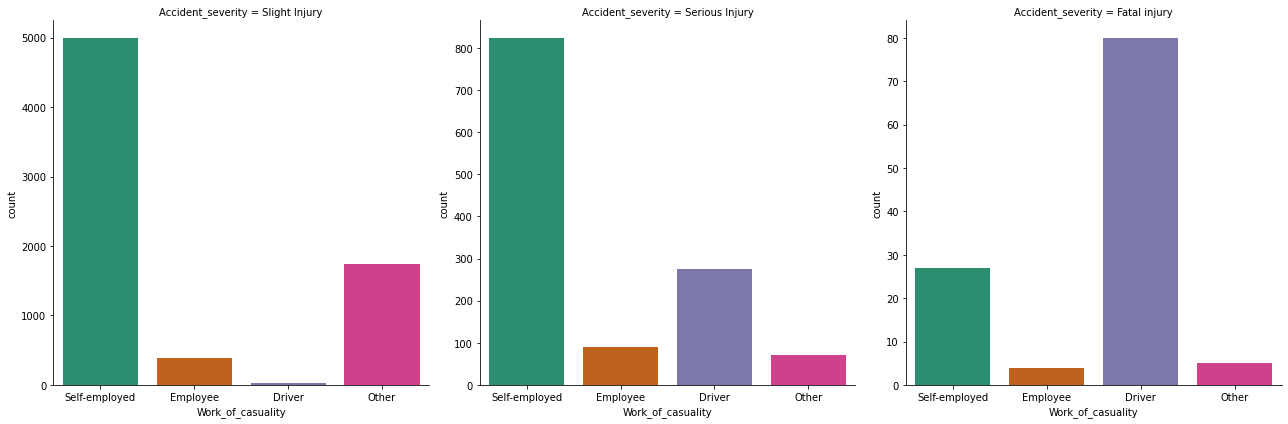

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


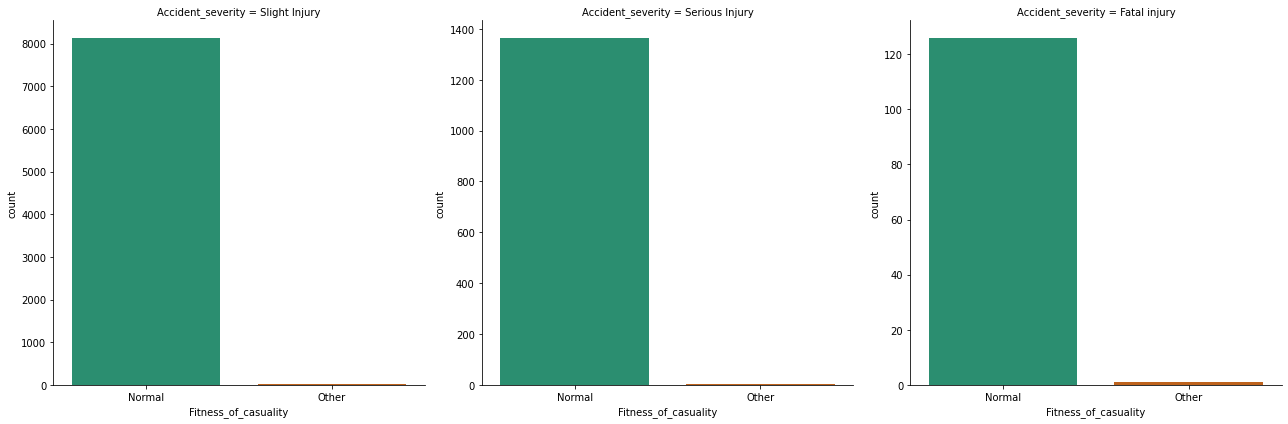

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


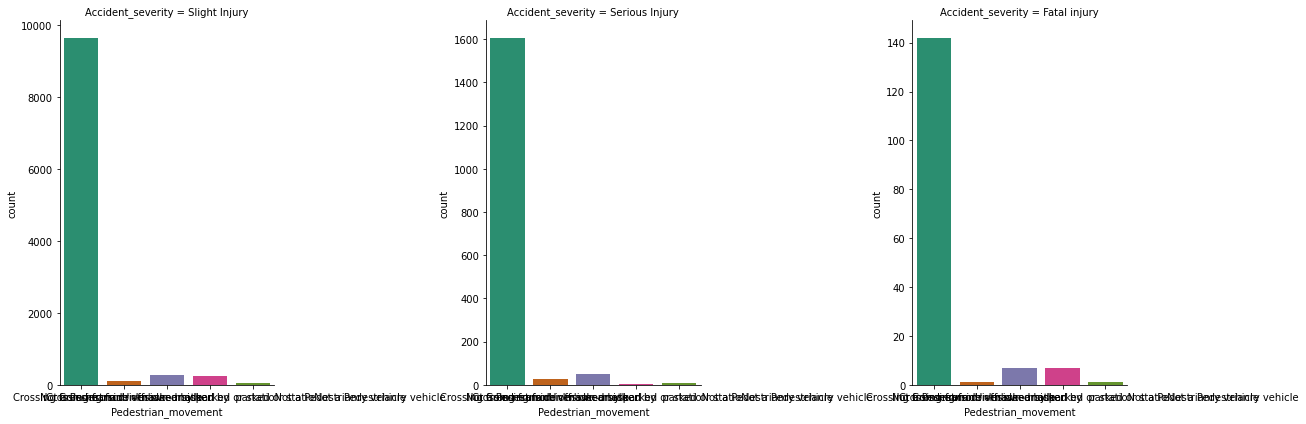

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


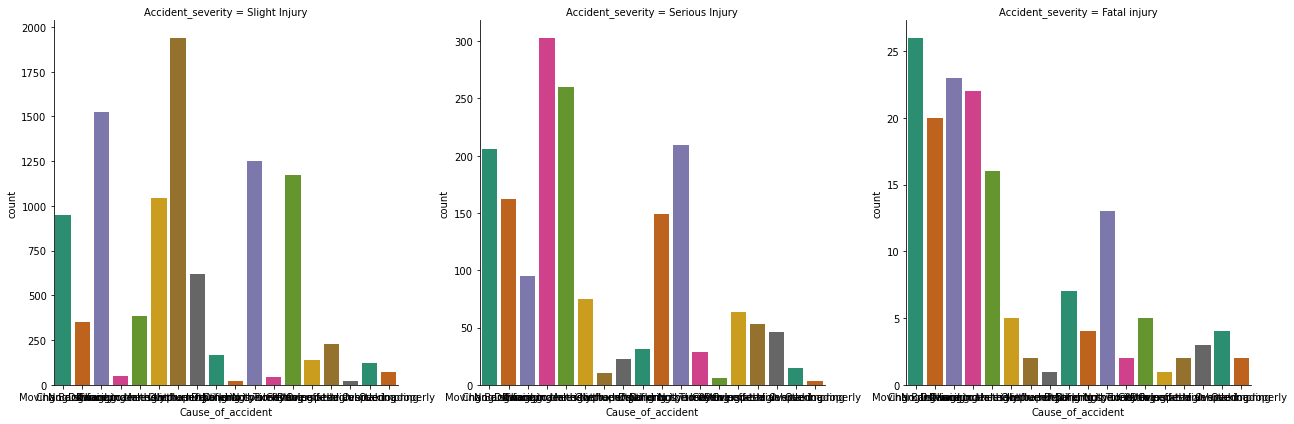

In [ ]:
for col in rta.drop('Accident_severity', axis=1):
    g = sns.FacetGrid(rta, col='Accident_severity', size=6, aspect=1, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

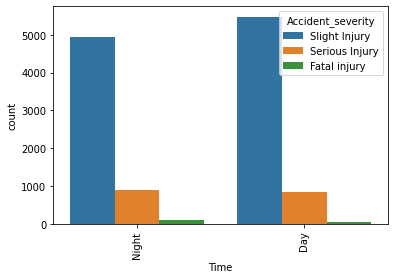

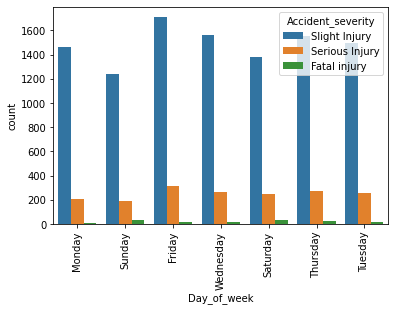

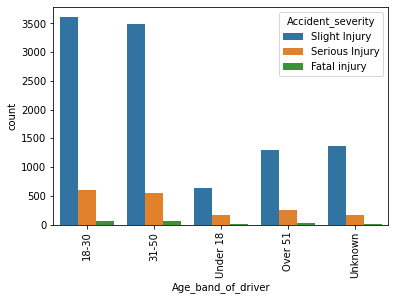

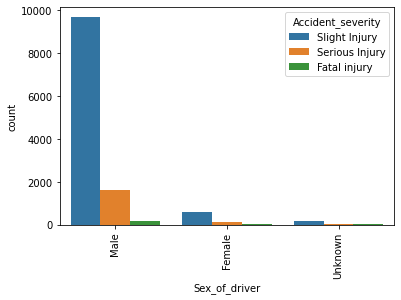

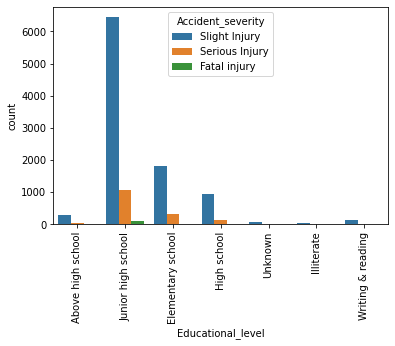

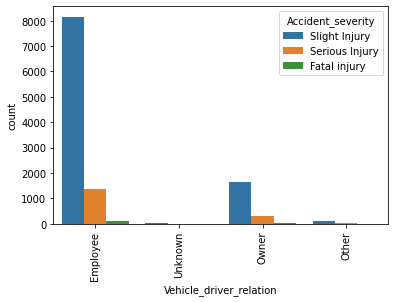

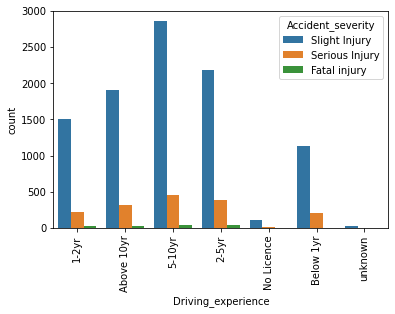

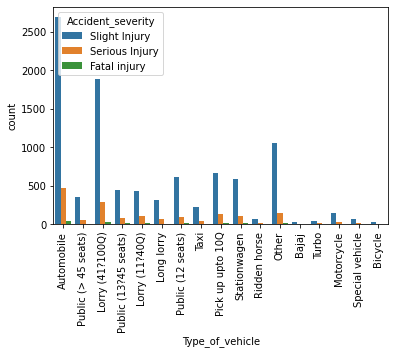

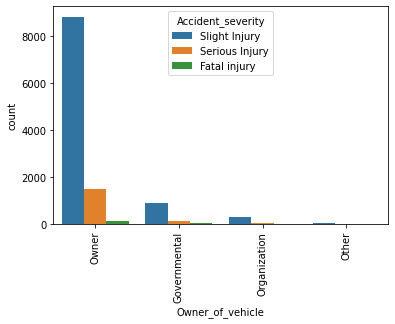

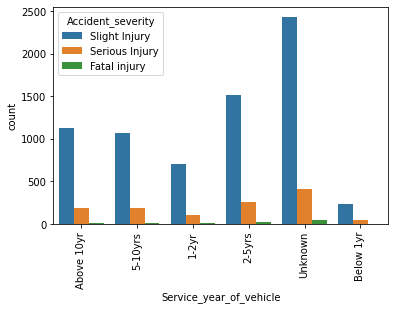

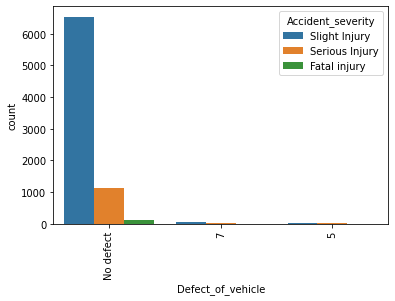

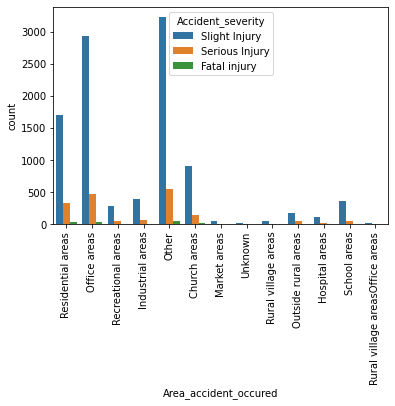

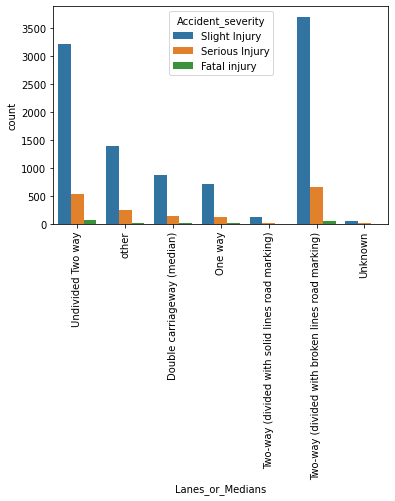

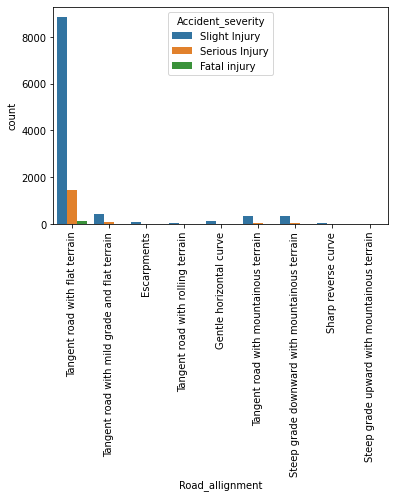

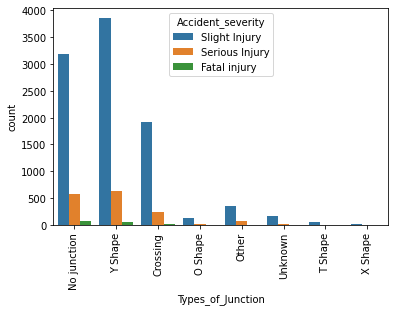

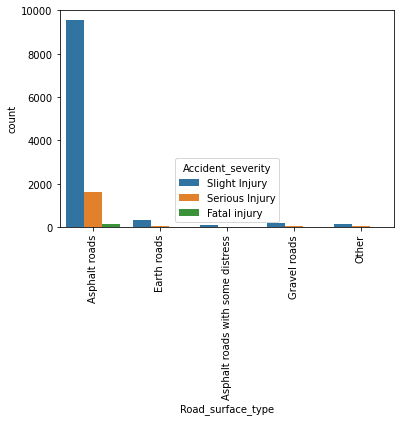

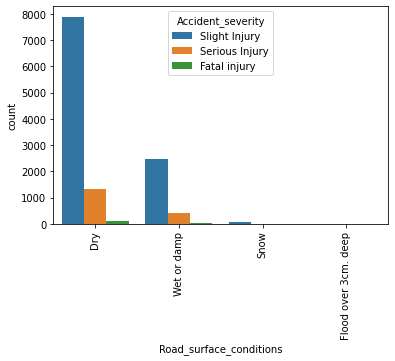

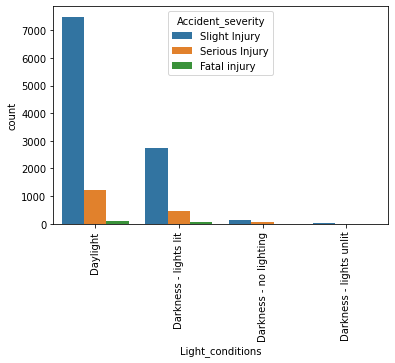

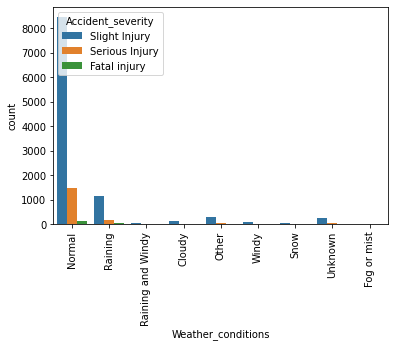

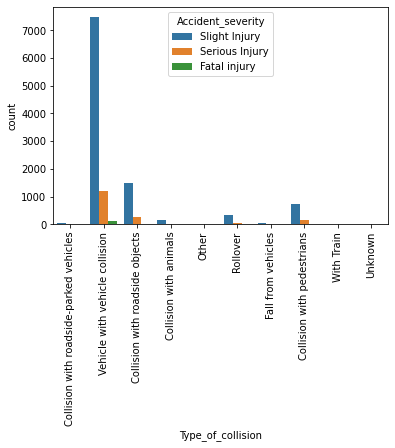

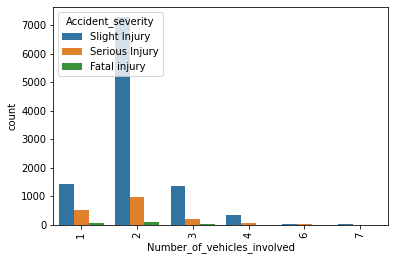

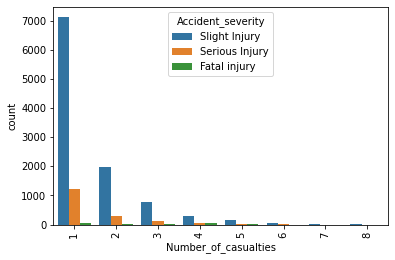

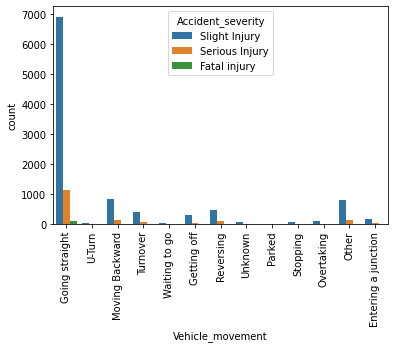

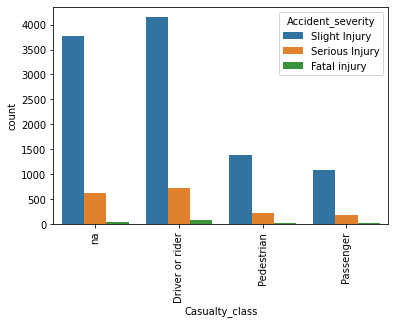

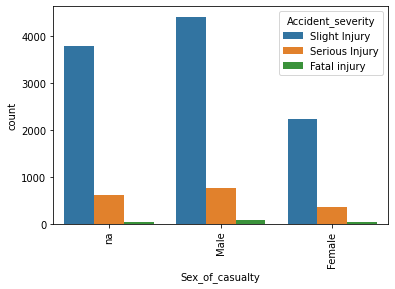

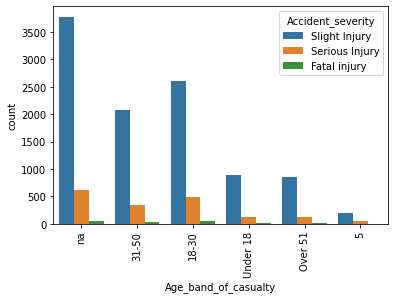

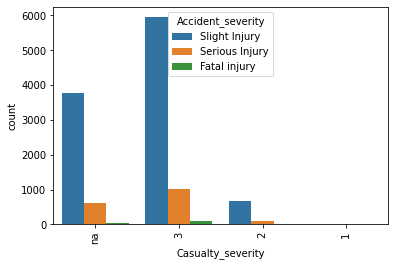

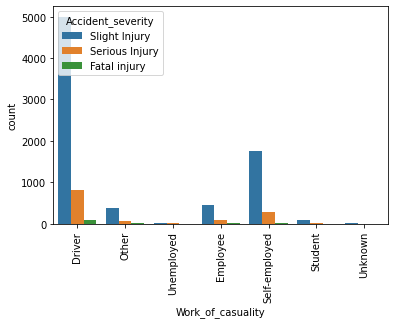

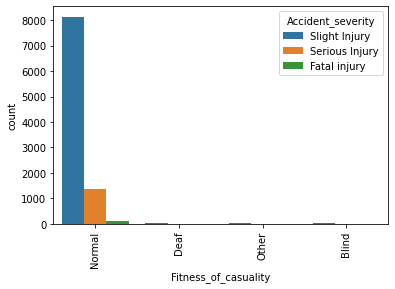

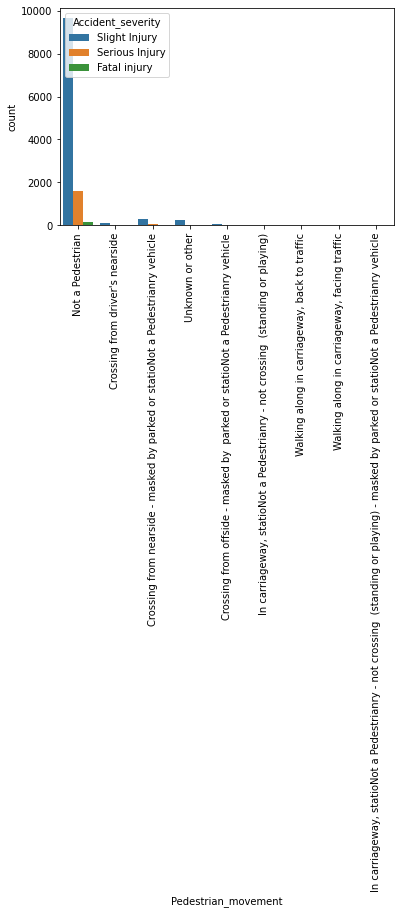

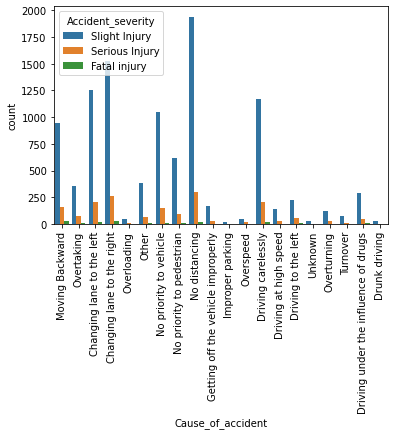

In [ ]:
for col in rta.drop('Accident_severity', axis=1):
    sns.countplot(x=rta[col],hue=rta['Accident_severity'])
    plt.xticks(rotation=90)
    plt.show()

**Observations:**

* Most of the accidents with fatal injuries happened in night.
* Most of the accidents with fatal injuries happened on weekends.
* Fatality occured on saturdays and sundays.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-       10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.



#**PREPROCESSING**

##Spelling mistake handling

In [4]:
# replacing misspelled vehicle type names

# Lorry
rta.loc[(rta['Type_of_vehicle'] == "Lorry (41?100Q)") | 
         (rta['Type_of_vehicle'] == "Lorry (11?40Q)") | 
         (rta['Type_of_vehicle'] == "Pick up upto 10Q")
         , 'Type_of_vehicle'] = 'Lorry'

rta.loc[(rta['Type_of_vehicle'] == "Public (12 seats)") | 
         (rta['Type_of_vehicle'] == "Public (13?45 seats)") | 
         (rta['Type_of_vehicle'] == "Public (> 45 seats)")
         , 'Type_of_vehicle'] = 'Public Vehicles'




In [5]:
rta.loc[rta['Defect_of_vehicle'] == "No defect", 'Defect_of_vehicle'] = '0'

In [6]:
# replacing misspelled Area_accident_occured names

# Rural village areasOffice areas
rta.loc[rta['Area_accident_occured'] == "Rural village areasOffice areas", 'Area_accident_occured'] = 'Rural village areas or Office areas'


In [7]:
#to_remove 5 in age band of casuality
rta=rta.drop(rta.index[rta['Age_band_of_casualty']=='5'])

In [8]:
rta['Cause_of_accident'].replace('Driving at high speed','Overspeed',inplace=True)

In [9]:
from typing import List
def display_cols_value_counts(col_names:List[str]):
    for col_name in col_names:
        print('-'*30)
        print(f"Column: {col_name}")
        print('-'*30)
        print(rta[col_name].value_counts())
        print('')

display_cols_value_counts(rta.columns)        

------------------------------
Column: Time
------------------------------
15:30:00    117
17:10:00    109
18:30:00    101
16:00:00     96
17:00:00     96
           ... 
1:37:00       1
18:54:00      1
9:31:00       1
19:04:00      1
2:47:00       1
Name: Time, Length: 1073, dtype: int64

------------------------------
Column: Day_of_week
------------------------------
Friday       1992
Thursday     1813
Wednesday    1811
Tuesday      1734
Monday       1652
Saturday     1632
Sunday       1438
Name: Day_of_week, dtype: int64

------------------------------
Column: Age_band_of_driver
------------------------------
18-30       4181
31-50       4015
Over 51     1561
Unknown     1515
Under 18     800
Name: Age_band_of_driver, dtype: int64

------------------------------
Column: Sex_of_driver
------------------------------
Male       11210
Female       684
Unknown      178
Name: Sex_of_driver, dtype: int64

------------------------------
Column: Educational_level
---------------------------

## **Missing values**

In [ ]:
rta.isna().sum()[rta.isna().sum() != 0]

Educational_level           724
Vehicle_driver_relation     566
Driving_experience          811
Type_of_vehicle             931
Owner_of_vehicle            472
Service_year_of_vehicle    3866
Defect_of_vehicle          4347
Area_accident_occured       234
Lanes_or_Medians            377
Road_allignment             141
Types_of_Junction           863
Road_surface_type           170
Type_of_collision           151
Vehicle_movement            299
Work_of_casuality          3140
Fitness_of_casuality       2588
dtype: int64

In [ ]:
#missing values in percentage
rta.isna().sum() /rta.shape[0] *100

Time                            0.000000
Day_of_week                     0.000000
Age_band_of_driver              0.000000
Sex_of_driver                   0.000000
Educational_level               5.997349
Vehicle_driver_relation         4.688535
Driving_experience              6.718025
Type_of_vehicle                 7.712061
Owner_of_vehicle                3.909874
Service_year_of_vehicle        32.024520
Defect_of_vehicle              36.008946
Area_accident_occured           1.938370
Lanes_or_Medians                3.122929
Road_allignment                 1.167992
Types_of_Junction               7.148774
Road_surface_type               1.408217
Road_surface_conditions         0.000000
Light_conditions                0.000000
Weather_conditions              0.000000
Type_of_collision               1.250828
Number_of_vehicles_involved     0.000000
Number_of_casualties            0.000000
Vehicle_movement                2.476806
Casualty_class                  0.000000
Sex_of_casualty 

#### Missing values Handling

Inference: 

* We can handle all null values. But there are also, "Unknown" and "na" as value in the column which is also equal to null.  Have to deal with that too!

In [10]:
rta.loc[rta['Age_band_of_driver'] == "Unknown", 'Age_band_of_driver'] = '18-30'
rta.loc[rta['Sex_of_driver'] == "Unknown", 'Sex_of_driver'] = 'Male'
rta.loc[rta['Driving_experience'] == "unknown", 'Driving_experience'] = '5-10yr'
rta.loc[rta['Service_year_of_vehicle'] == "Unknown", 'Service_year_of_vehicle'] = '2-5yrs'
rta.loc[rta['Types_of_Junction'] == "Unknown", 'Types_of_Junction'] = 'Y Shape'
rta.loc[rta['Lanes_or_Medians'] == "Unknown", 'Lanes_or_Medians'] = 'Two-way (divided with broken lines road marking)'
rta.loc[rta['Weather_conditions'] == "Unknown", 'Weather_conditions'] = 'Normal'
rta.loc[rta['Type_of_collision'] == "Unknown", 'Type_of_collision'] = 'Vehicle with vehicle collision'
rta.loc[rta['Vehicle_movement'] == "Unknown", 'Vehicle_movement'] = 'Going straight'
rta.loc[rta['Cause_of_accident'] == "Unknown", 'Cause_of_accident'] = 'No distancing'
rta.loc[rta['Vehicle_driver_relation'] == "Unknown", 'Vehicle_driver_relation'] = 'Employee'
rta.loc[rta['Work_of_casuality'] == "Unknown", 'Work_of_casuality'] = 'Driver'
rta.loc[rta['Area_accident_occured'] == "Unknown", 'Area_accident_occured'] = 'Other'

rta.loc[rta['Casualty_class'] == "na", 'Casualty_class'] = 'Driver or rider'
rta.loc[rta['Casualty_severity'] == "na", 'Casualty_severity'] = '3'
rta.loc[rta['Age_band_of_casualty'] == "na", 'Age_band_of_casualty'] = '18-30'
rta.loc[rta['Sex_of_casualty'] == "na", 'Sex_of_casualty'] = 'Male'


In [11]:
rta['Road_surface_type'].fillna(rta['Road_surface_type'].mode()[0],inplace=True)
rta['Road_allignment'].fillna(rta['Road_allignment'].mode()[0], inplace=True)
rta['Type_of_collision'].fillna(rta['Type_of_collision'].mode()[0], inplace=True)
rta['Vehicle_movement'].fillna(rta['Vehicle_movement'].mode()[0], inplace=True)
rta['Lanes_or_Medians'].fillna(rta['Lanes_or_Medians'].mode()[0], inplace=True)
rta['Types_of_Junction'].fillna(rta['Types_of_Junction'].mode()[0], inplace=True)
rta['Educational_level'].fillna(rta['Educational_level'].mode()[0], inplace=True)
rta['Driving_experience'].fillna(rta['Driving_experience'].mode()[0],inplace=True)
rta['Type_of_vehicle'].fillna(rta['Type_of_vehicle'].mode()[0],inplace=True)
rta['Fitness_of_casuality'].fillna(rta['Fitness_of_casuality'].mode()[0],inplace=True)
rta['Defect_of_vehicle'].fillna(rta['Defect_of_vehicle'].mode()[0],inplace=True)
rta['Vehicle_driver_relation'].fillna(rta['Vehicle_driver_relation'].mode()[0],inplace=True)
rta['Owner_of_vehicle'].fillna(rta['Owner_of_vehicle'].mode()[0],inplace=True)
rta['Work_of_casuality'].fillna(rta['Work_of_casuality'].mode()[0],inplace=True)
rta['Area_accident_occured'].fillna(rta['Area_accident_occured'].mode()[0],inplace=True)
rta['Service_year_of_vehicle'].fillna(rta['Service_year_of_vehicle'].mode()[0],inplace=True)


rta.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

Inference: 

* As from above output, we can handle all null values. 

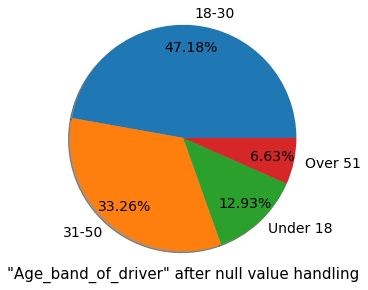

In [ ]:
fig_2=plt.pie(x=rta['Age_band_of_driver'].value_counts(),
        labels=list(rta['Age_band_of_driver'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.xlabel('"Age_band_of_driver" after null value handling', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

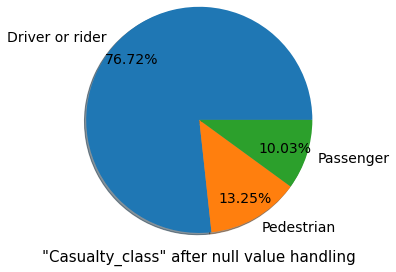

In [ ]:
fig_2=plt.pie(x=rta['Casualty_class'].value_counts(),
        labels=list(rta['Casualty_class'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.xlabel('"Casualty_class" after null value handling', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

Distribution graphs of sampled columns:

## Numerical data analysis

In [ ]:
### Let's analyze and clean out the numerical columns first.

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features=[rta.select_dtypes(include=numerics).columns]
print(numeric_features)

[Index(['Number_of_vehicles_involved', 'Number_of_casualties'], dtype='object')]


In [ ]:
# checking the numerical statistics of our data
rta.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12072.0,2.036365,0.684941,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12072.0,1.543572,1.001411,1.0,1.0,1.0,2.0,8.0


In [ ]:
## Number_of vechicles_invloved

for feature in numeric_features:
    print(rta[feature].isnull().sum())


Number_of_vehicles_involved    0
Number_of_casualties           0
dtype: int64


Inference: 

* As we can observe, the numerical features dont have any null values. But, It may have any incorrect/not accurate values. Need to concentrate on it.

In [ ]:
### Lets check the values of the features, so that we can come across the unique value

rta['Number_of_vehicles_involved'].value_counts()

2    8196
1    1963
3    1529
4     335
6      42
7       7
Name: Number_of_vehicles_involved, dtype: int64

 

* No, incorrect values are present in 
"Number_of_vehicles_involved" Feature.

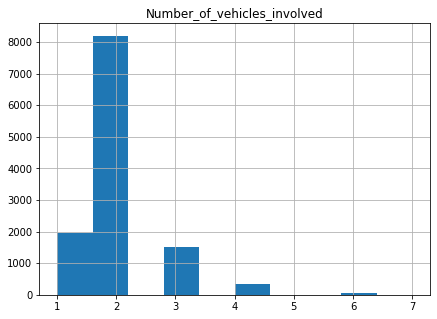

In [ ]:
rta.hist('Number_of_vehicles_involved', figsize=(7,5))
plt.show()

In [ ]:
rta['Number_of_casualties'].value_counts()

1    8244
2    2252
3     883
4     380
5     199
6      84
7      22
8       8
Name: Number_of_casualties, dtype: int64

* Same for"Number_of_casualties" feature too.

### Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


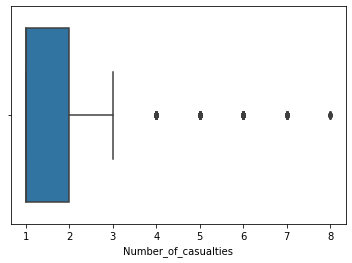

In [12]:
sns.boxplot(rta['Number_of_casualties'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


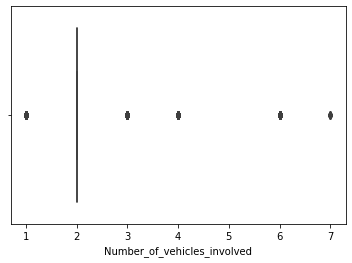

In [13]:
sns.boxplot(rta['Number_of_vehicles_involved'])
plt.show()

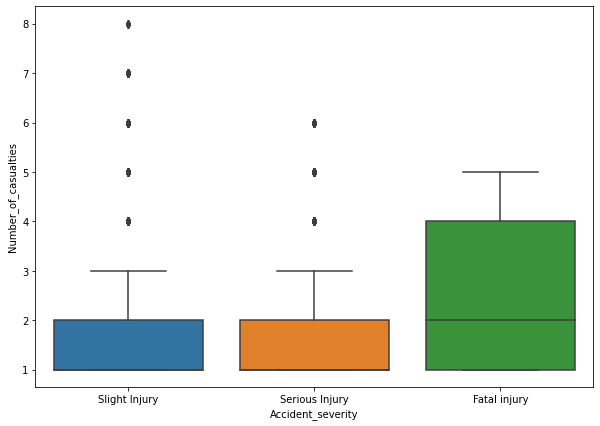

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(data=rta, x='Accident_severity', y='Number_of_casualties')
plt.show()

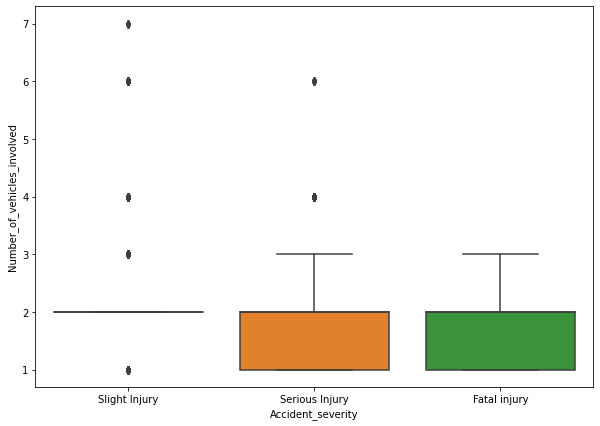

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(data=rta, x='Accident_severity', y='Number_of_vehicles_involved')
plt.show()

###Correlation of numerical variables

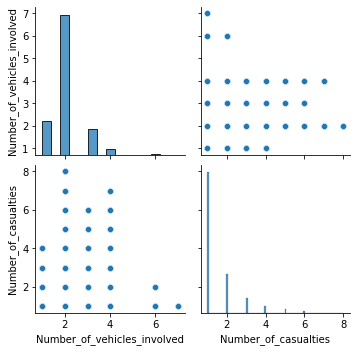

In [ ]:
sns.pairplot(rta[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

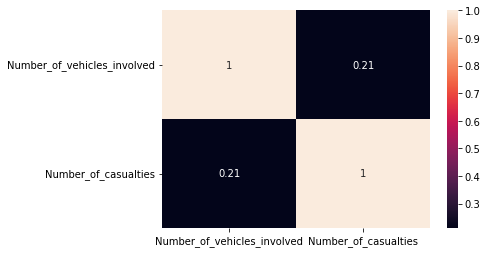

In [ ]:
correlation_matrix = rta[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Inference:

We really may need "Number_of_vehicles_involved" because that might be lead to severity of accident (for Example: If number of vehicles is 2 and If lorry and bike collided, then the severity of bike rider is severe, elif bike and bike slight injury, and so on.. cases).

1. We may or may not need the "Number_of_vehicles_involved", but there is a 1 supporting case, so this may be a useful feature as data cannot be lost if there is a slight chance of dependency.

2. Coming to "Number_of_casualities", we really dont consider the number of patients. As we are aiming for severity of accident. So, we can drop the "Number_of_casualities" column.

3. In this heatmap, we can find that these are not much extremely correlated variables

## Categorical data analysis

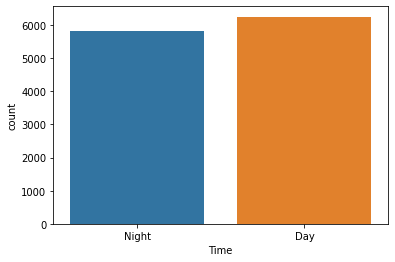

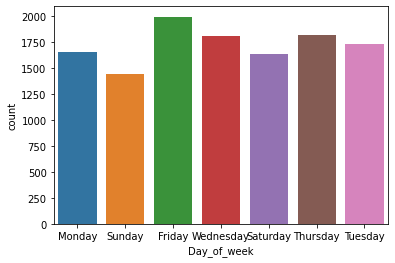

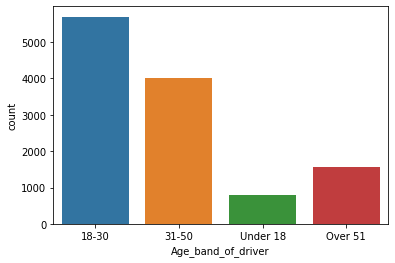

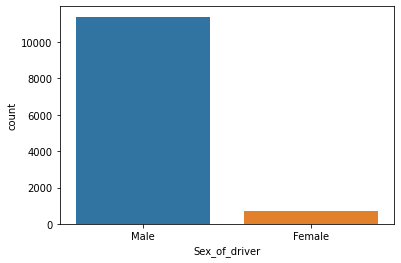

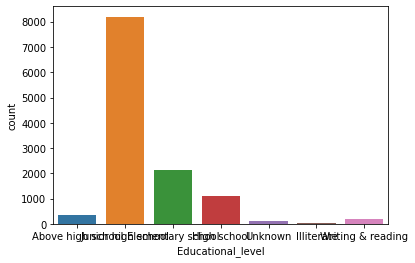

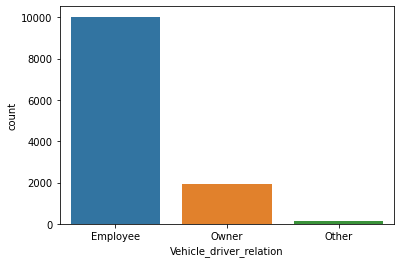

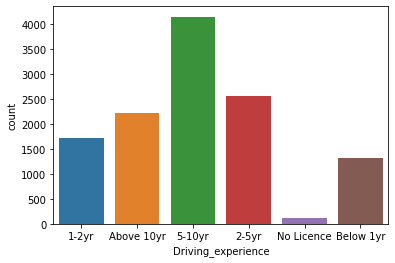

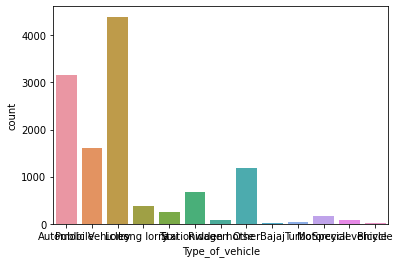

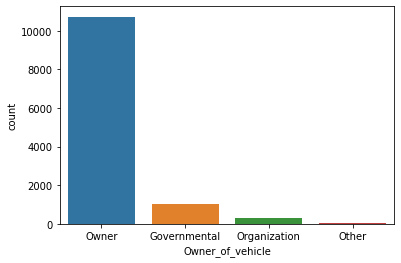

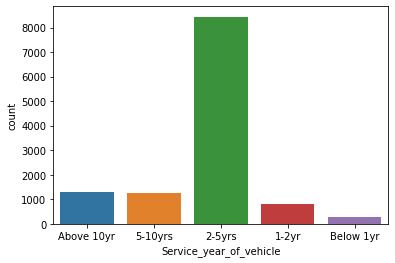

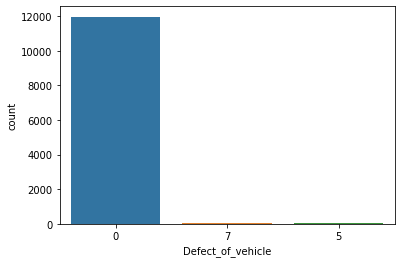

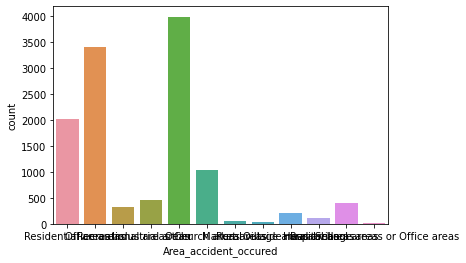

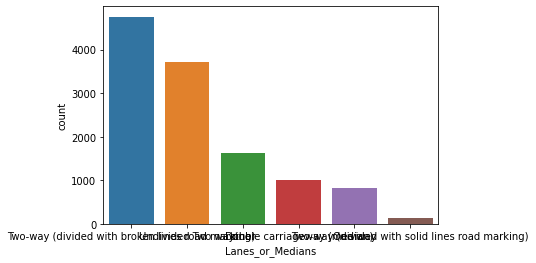

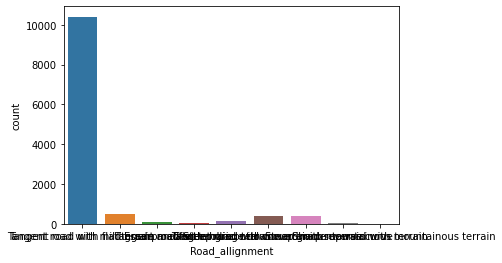

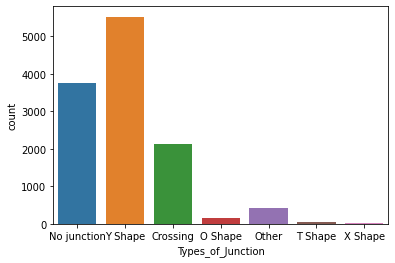

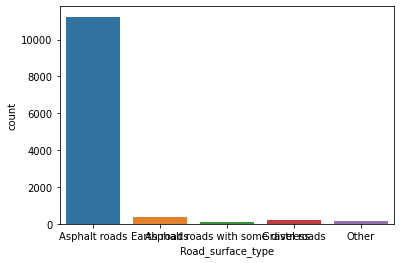

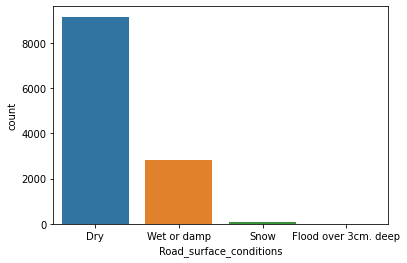

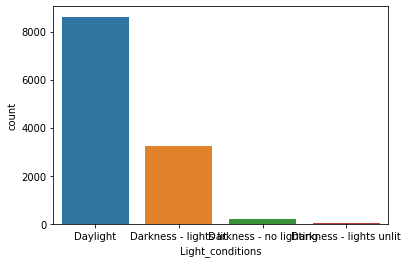

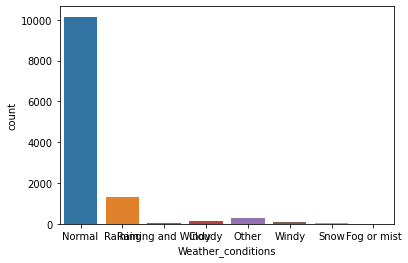

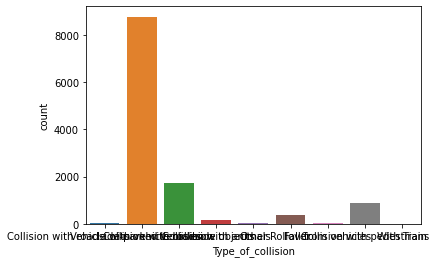

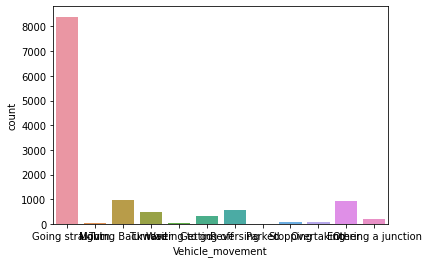

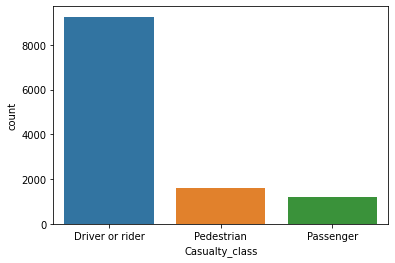

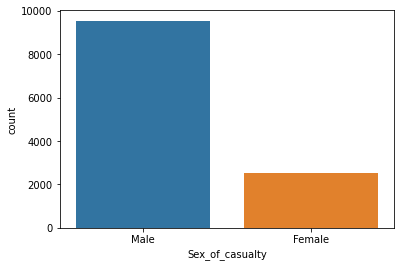

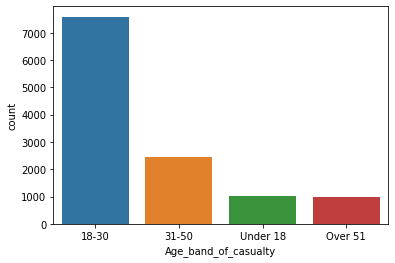

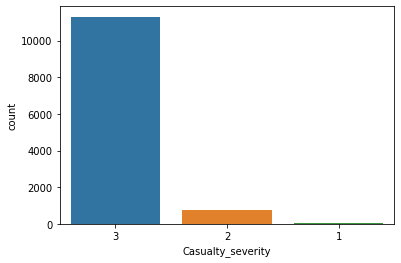

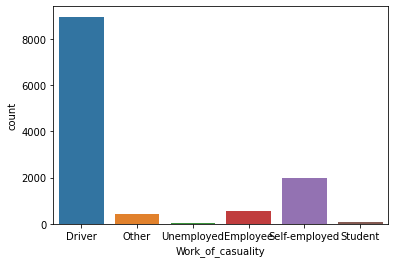

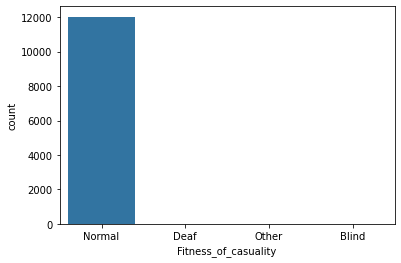

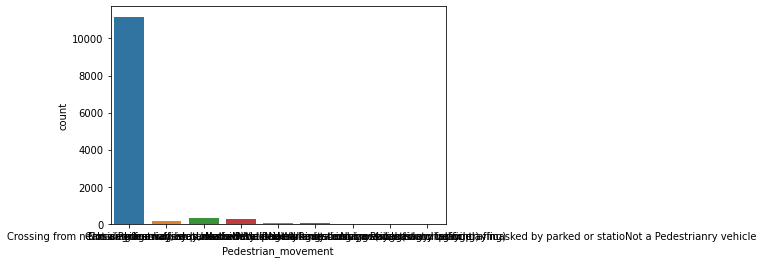

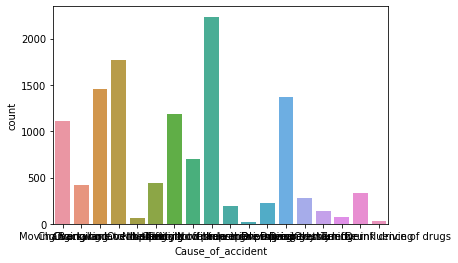

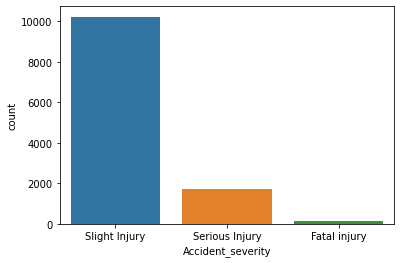

In [ ]:
for col in rta.select_dtypes(include='object'):
    if rta[col].nunique() <= 22:
        sns.countplot(x=col, data=rta)
        plt.show()

###Encoding

In [13]:
# Columns of object type
cats_cols = rta.columns[rta.dtypes == 'object']
cats_cols

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

Map logical categorical columns using dictionary

In [14]:

rta['Sex_of_driver'] = rta['Sex_of_driver'].map({'Female': 0, 
                                                 'Male': 1})
rta['Time'] = rta['Time'].map({'Day': 1, 
                               'Night': 0})

rta['Age_band_of_driver'] = rta['Age_band_of_driver'].map({'Under 18': 0, 
                                                            '18-30': 1, 
                                                            '31-50': 2, 
                                                            'Over 51': 3})
rta['Driving_experience'] = rta['Driving_experience'].map({'No Licence': 0, 
                                                           'Below 1yr': 1, 
                                                           '1-2yr': 2, 
                                                           '2-5yr': 3, 
                                                           '5-10yr': 4, 
                                                           'Above 10yr': 5})
rta['Educational_level'] = rta['Educational_level'].map({'Illiterate': 0, 
                                                         'Writing & reading': 1, 
                                                         'Elementary school': 2, 
                                                         'Junior high school': 3, 
                                                         'High school': 4, 
                                                         'Above high school': 5})

rta['Accident_severity'] = rta['Accident_severity'].map({'Slight Injury': 0, 
                                                         'Serious Injury': 1, 
                                                         'Fatal injury': 2})
rta['Age_band_of_casualty']=rta['Age_band_of_casualty'].map({'Under 18':0,
                                                             '18-30':1,
                                                             '31-50':2,
                                                             'Over 51':3})


#mapped_cols = ['Driving_experience', 'Sex_of_driver', 'Age_band_of_driver', 'Educational_level', 'Time', 'Accident_severity','Service_year_of_vehicle']


In [15]:
rta['Defect_of_vehicle']=rta['Defect_of_vehicle'].astype('int')
rta['Casualty_severity']=rta['Casualty_severity'].astype('int')


Time                           float64
Day_of_week                     object
Age_band_of_driver               int64
Sex_of_driver                    int64
Educational_level              float64
Vehicle_driver_relation         object
Driving_experience               int64
Type_of_vehicle                 object
Owner_of_vehicle                object
Service_year_of_vehicle         object
Defect_of_vehicle                int64
Area_accident_occured           object
Lanes_or_Medians                object
Road_allignment                 object
Types_of_Junction               object
Road_surface_type               object
Road_surface_conditions         object
Light_conditions                object
Weather_conditions              object
Type_of_collision               object
Number_of_vehicles_involved      int64
Number_of_casualties             int64
Vehicle_movement                object
Casualty_class                  object
Sex_of_casualty                 object
Age_band_of_casualty     



* Converting Categorical Feature values to numerical values using Label Encoding.
* Label Encoding provides values from 1 to N.

In [19]:
from sklearn.preprocessing import LabelEncoder
cats_cols = rta.columns[rta.dtypes == 'object']
for cats_col in cats_cols:
    le = LabelEncoder()
    rta[cats_col] = le.fit_transform(rta[cats_col])

In [20]:
rta.dtypes

Time                           float64
Day_of_week                      int64
Age_band_of_driver               int64
Sex_of_driver                    int64
Educational_level              float64
Vehicle_driver_relation          int64
Driving_experience               int64
Type_of_vehicle                  int64
Owner_of_vehicle                 int64
Service_year_of_vehicle          int64
Defect_of_vehicle                int64
Area_accident_occured            int64
Lanes_or_Medians                 int64
Road_allignment                  int64
Types_of_Junction                int64
Road_surface_type                int64
Road_surface_conditions          int64
Light_conditions                 int64
Weather_conditions               int64
Type_of_collision                int64
Number_of_vehicles_involved      int64
Number_of_casualties             int64
Vehicle_movement                 int64
Casualty_class                   int64
Sex_of_casualty                  int64
Age_band_of_casualty     

### Scaling

No need of scaling here!!!!

## **Feature Importance**

**Observing useful features:**

As from the data, we are classifying the severity of accident happened.
1. So, we really dont need the date and time of particular instance. So, they can be left out.
2. Age_band_of_driver really would be an important feature, as the age signifes the immunity of patient. If the patient is older human (>50 or >60), his immunity levels are not so high so the injuries/recovering wont happen so easily. So, we can consider this.

3. Sex_of_driver, can be considered.

4. Educational_level doesn't really matter, while we are focussing on accident severity. We really dont think of educational_level when an accident happened to the person, we check for his condition. Whether he is educated or un-educated, the severity of accident wont show any kindness to the person. so, we can drop this.
5. Vehicle_driver_relation too doesnt matter, as we dont need whether he is a owner of it or not. 

6. Driving_experience it may be useful, so we can consider
7. Type_of_vehicle it may be useful, suppose if it is a lorry, we can try to conclude the severity of accident.

8. Owner_of_vehicle, can be left out as we dont do any thing with owner.

9. Service_year_of_vehicle, this feature can be helpful as it specifies the condition of vehicle. 

10. Defect_of_vehicle, can be considered for the condition as of "Service_year_of_vehicle".

11. Area_accident_occured, dont really matter the severity really depends on collision of two/three vehicles or other irrespective of place.

12. Lanes_or_medians,Road_alignment,Types_of_junction can be considered.


13. Road_surface_type, may be helpful in resulting of severity. Suppose, if the patient would fall from large distances or from highway which is at a height to normal layout road.

14. Road_surface_conditions, can be considered like "Road_surface_type".

15. Light_conditions and Weather_conditions can be considered because this may result in accidents.


16. Type_of_collision, can be considered.

17. Vehilce_movement, may be helpful.

18. Causalty_class, may be useful.

19. Sex_of_casualty, can be dropped. 

20. Age_band_of_casulity, can be considered.

21. Casuality_severity, can be considered.

22. Work_of_casuality, can be dropped as we dont need any inferences from the patient's work.

23. Fitness_of_casuality, can be considered.

24. Pedestrian_movement, can be dropped.

25. Cause_of_accident, can be considered. It  is an important feature.


###Correlation 

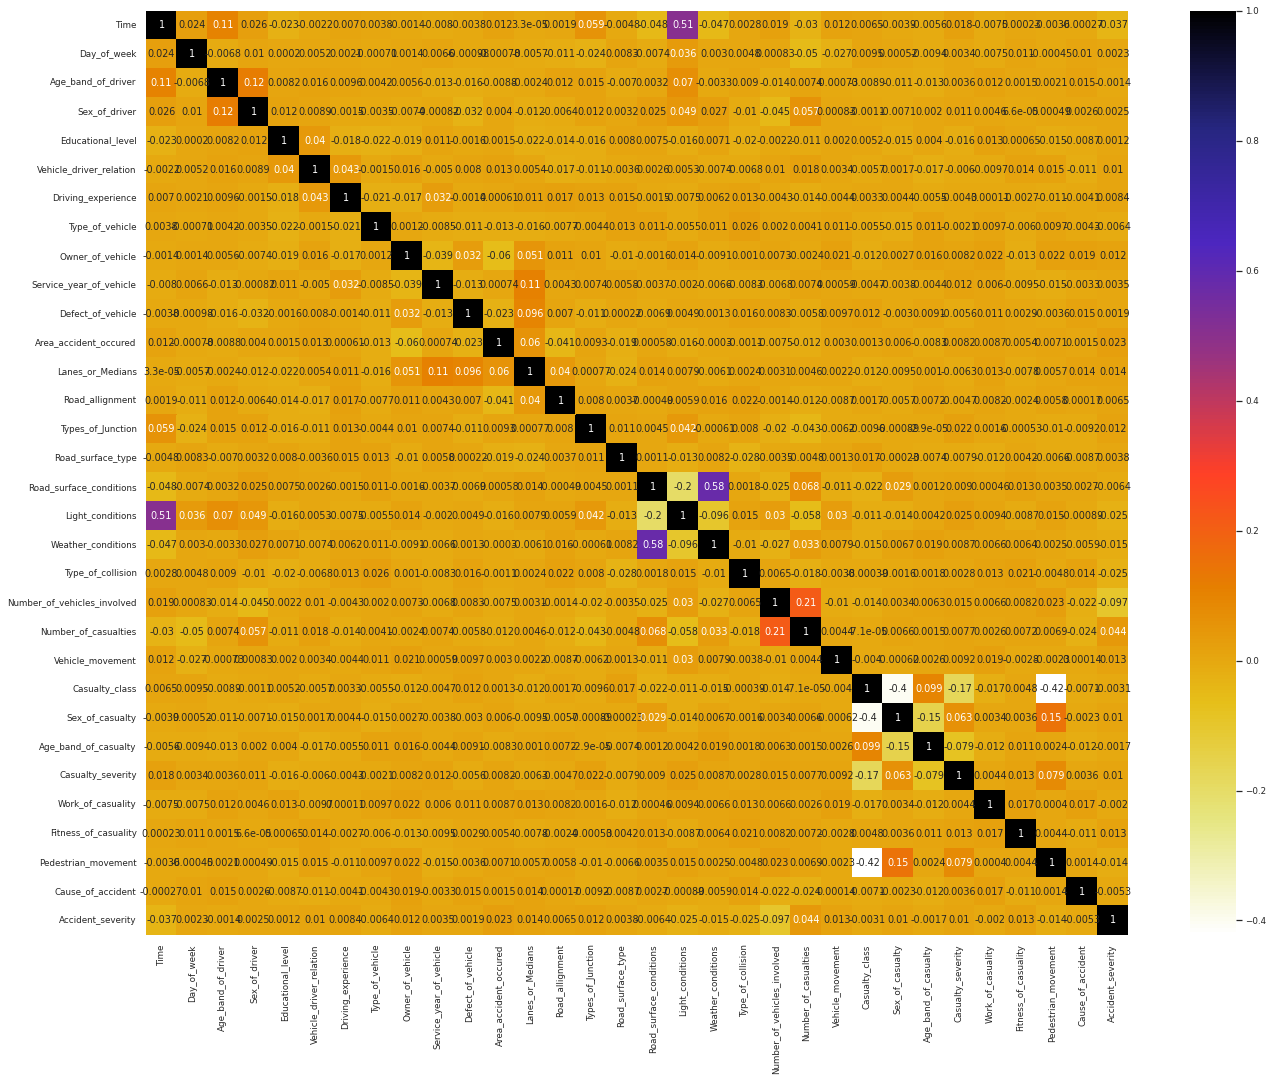

In [ ]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(rta.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [21]:

rta_data_corr = rta.corr()
rta_data_corr.style.background_gradient(cmap="cool")

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
Time,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Day_of_week,nan,1.000000,-0.006787,0.010400,0.003909,0.005210,0.002082,-0.000712,0.001442,0.006576,0.000421,0.002109,-0.005737,-0.011228,-0.024329,0.008332,-0.007371,0.036251,0.003031,0.004783,0.000834,-0.050139,-0.027064,0.009490,0.000524,-0.009430,0.003420,-0.007481,0.009434,-0.000455,0.010171,0.002276
Age_band_of_driver,nan,-0.006787,1.000000,0.119110,0.004672,0.015687,0.009553,0.004203,0.005607,-0.013388,-0.016818,-0.002659,-0.002406,0.012202,0.015123,-0.007022,0.003150,0.070471,-0.003335,0.009009,-0.014272,0.007378,-0.000727,-0.008875,-0.010565,-0.012546,0.003600,0.011741,-0.003468,0.002122,0.015443,-0.001427
Sex_of_driver,nan,0.010400,0.119110,1.000000,0.010887,0.008885,-0.001464,-0.003511,-0.007405,-0.000818,-0.031082,-0.000141,-0.011804,-0.006438,0.011906,0.003196,0.025067,0.049352,0.027161,-0.010297,-0.044532,0.056822,0.000831,-0.001111,-0.007057,0.002000,0.010685,0.004620,0.006003,0.000495,0.002603,0.002501
Educational_level,nan,0.003909,0.004672,0.010887,1.000000,0.012017,-0.028621,-0.020102,-0.009710,0.017804,-0.003270,0.001272,-0.010704,-0.016000,-0.012709,0.004529,0.010076,-0.018981,0.010792,-0.023723,-0.003212,-0.011867,-0.002012,0.009572,-0.017847,0.000920,-0.015949,0.011097,-0.003041,-0.015970,-0.009370,-0.001364
Vehicle_driver_relation,nan,0.005210,0.015687,0.008885,0.012017,1.000000,0.042910,-0.001536,0.016361,-0.005024,0.009978,0.019995,0.005431,-0.017345,-0.011104,-0.003598,0.002579,0.005292,-0.007434,-0.006777,0.010113,0.018381,0.003399,-0.005721,0.001663,-0.017225,-0.005950,-0.009701,0.018886,0.015288,-0.011300,0.010143
Driving_experience,nan,0.002082,0.009553,-0.001464,-0.028621,0.042910,1.000000,-0.021190,-0.016621,0.031690,-0.000068,-0.004918,0.011276,0.016960,0.013416,0.014764,-0.001467,-0.007506,0.006206,0.012857,-0.004287,-0.014125,-0.004399,0.003291,0.004443,-0.005461,-0.004307,0.000111,0.001625,-0.010587,-0.004108,0.008366
Type_of_vehicle,nan,-0.000712,0.004203,-0.003511,-0.020102,-0.001536,-0.021190,1.000000,0.001249,-0.008508,-0.012694,-0.006677,-0.016055,-0.007705,-0.004380,0.013317,0.011278,-0.005471,0.010955,0.025839,0.002026,0.004132,0.010707,-0.005474,-0.015132,0.011421,-0.002051,0.009721,-0.011083,0.009741,-0.004278,-0.006361
Owner_of_vehicle,nan,0.001442,0.005607,-0.007405,-0.009710,0.016361,-0.016621,0.001249,1.000000,-0.038524,0.032908,-0.021608,0.050667,0.011449,0.010220,-0.010093,-0.001566,0.014399,-0.009072,0.001014,0.007337,-0.002421,0.021395,-0.012318,0.002729,0.016464,0.008221,0.021606,-0.003164,0.022303,0.018754,0.011701
Service_year_of_vehicle,nan,0.006576,-0.013388,-0.000818,0.017804,-0.005024,0.031690,-0.008508,-0.038524,1.000000,-0.012667,0.011259,0.106639,0.004338,0.007415,0.005849,-0.003741,-0.001993,-0.006585,-0.008340,-0.006774,0.007378,0.000593,-0.004730,-0.003759,-0.004387,0.012313,0.005998,-0.008275,-0.014834,-0.003269,0.003522


In [ ]:
rta.corr()['Accident_severity'].sort_values(ascending=False)

Accident_severity              1.000000
Number_of_casualties           0.043857
Area_accident_occured          0.022837
Lanes_or_Medians               0.013666
Fitness_of_casuality           0.012889
Vehicle_movement               0.012717
Owner_of_vehicle               0.011701
Types_of_Junction              0.011552
Casualty_severity              0.010430
Vehicle_driver_relation        0.010143
Sex_of_casualty                0.010039
Driving_experience             0.008366
Road_allignment                0.006488
Road_surface_type              0.003821
Service_year_of_vehicle        0.003522
Sex_of_driver                  0.002501
Day_of_week                    0.002276
Defect_of_vehicle              0.001915
Educational_level              0.001166
Age_band_of_driver            -0.001427
Age_band_of_casualty          -0.001713
Work_of_casuality             -0.002040
Casualty_class                -0.003112
Cause_of_accident             -0.005288
Type_of_vehicle               -0.006361


###1.Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k='all')

In [ ]:
x = rta.drop(['Accident_severity'],axis=1)
y = rta['Accident_severity']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Feature 0: 7.239915
Feature 1: 0.185696
Feature 2: 0.261643
Feature 3: 1.496129
Feature 4: 0.082232
Feature 5: 1.474994
Feature 6: 1.755807
Feature 7: 0.040575
Feature 8: 0.780511
Feature 9: 0.655740
Feature 10: 1.248425
Feature 11: 2.279034
Feature 12: 1.603601
Feature 13: 0.485167
Feature 14: 0.309789
Feature 15: 0.761822
Feature 16: 1.073330
Feature 17: 5.932595
Feature 18: 2.353924
Feature 19: 3.120072
Feature 20: 49.029182
Feature 21: 29.418070
Feature 22: 0.928593
Feature 23: 0.261134
Feature 24: 1.217238
Feature 25: 0.244774
Feature 26: 0.492952
Feature 27: 0.081748
Feature 28: 1.285731
Feature 29: 1.285018
Feature 30: 0.108389


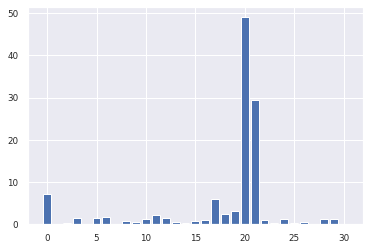

In [ ]:
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)


import matplotlib.pyplot as plt
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)


import matplotlib.pyplot as plt
for i in range(len(fs.scores_)):
    print( fs.scores_[i])

7.239914709904449
0.18569578791491453
0.26164254868455317
1.4961286983887228
0.08223151495264724
1.4749935835500396
1.755806931198816
0.040574839521609785
0.7805106552388977
0.6557400219966605
1.2484254880117898
2.279033826359933
1.6036008244637354
0.4851670084741135
0.30978853942849655
0.7618224690640304
1.0733303438383022
5.9325951614857395
2.353924205226204
3.1200716153656898
49.02918182478265
29.418070454244667
0.9285931943774838
0.26113389907873896
1.217237712729003
0.244773525363584
0.492952174297285
0.08174770720473366
1.2857312671556114
1.2850178173116495
0.1083890309867087


###2.Linear model inspection



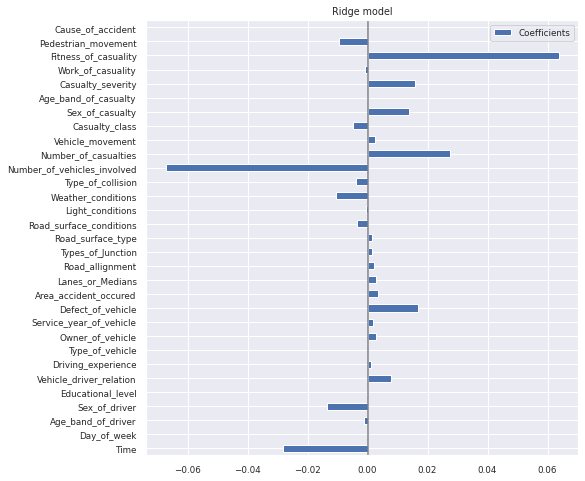

In [ ]:
from sklearn.linear_model import RidgeCV

model = RidgeCV()

model.fit(x_train, y_train)

coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(10, 8))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)


###3.Scale of coefficients

(0.0, 100.0)

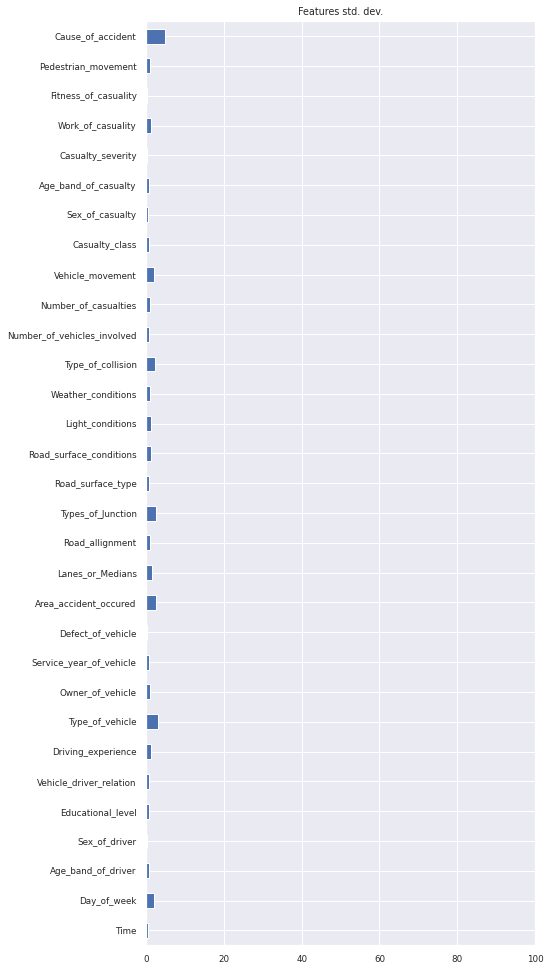

In [ ]:
x_train.std(axis=0).plot(kind='barh', figsize=(9, 17))
plt.title('Features std. dev.')
plt.subplots_adjust(left=.3)
plt.xlim((0, 100))

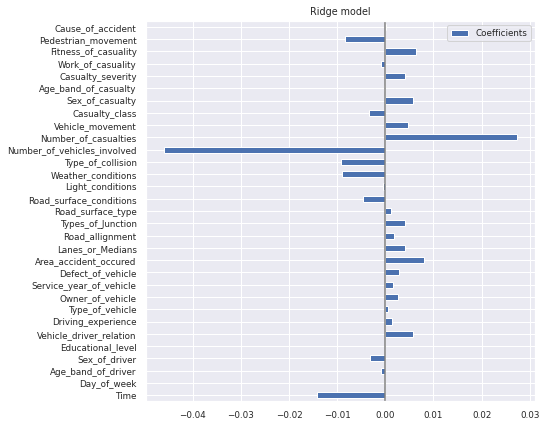

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), RidgeCV())

model.fit(x_train, y_train)

coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)



###4.Linear models with sparse coefficients (Lasso)

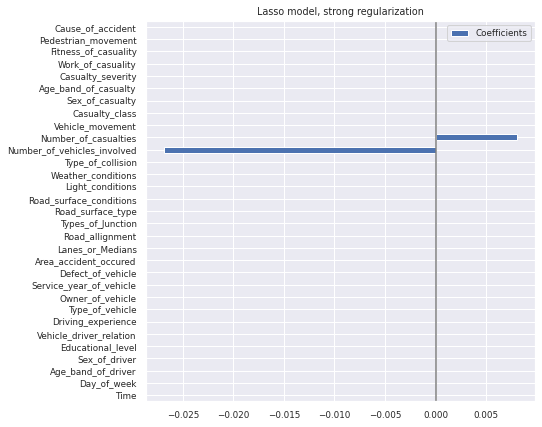

In [ ]:
from sklearn.linear_model import Lasso

model = make_pipeline(StandardScaler(), Lasso(alpha=.015))

model.fit(x_train, y_train)

coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, strong regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

###5.RandomForest feature_importances

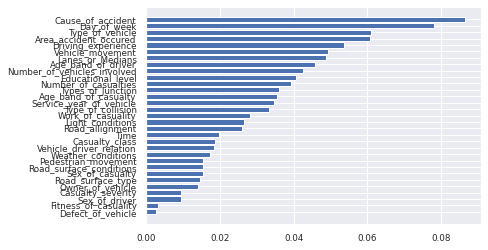

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])


###6.Feature importance by permutation





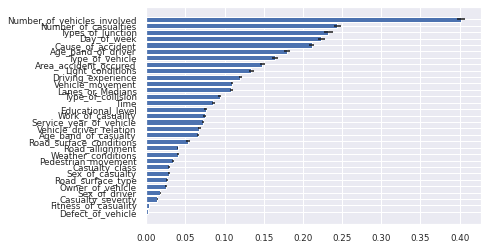

In [ ]:
# Any model could be used here

model = RandomForestRegressor()
# model = make_pipeline(StandardScaler(),
#                       RidgeCV())

model.fit(x_train, y_train)
def get_score_after_permutation(model, x, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    x_permuted = x.copy()
    col_idx = list(x.columns).index(curr_feat)
    # permute one column
    x_permuted.iloc[:, col_idx] = np.random.permutation(
        x_permuted[curr_feat].values)

    permuted_score = model.score(x_permuted, y)
    return permuted_score


def get_feature_importance(model, x, y, curr_feat):
    """ compare the score when curr_feat is permuted """

    baseline_score_train = model.score(x, y)
    permuted_score_train = get_score_after_permutation(model, x, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance


curr_feat = 'Cause_of_accident'

feature_importance = get_feature_importance(model, x_train, y_train, curr_feat)


n_repeats = 10

list_feature_importance = []
for n_round in range(n_repeats):
    list_feature_importance.append(
        get_feature_importance(model, x_train, y_train, curr_feat))
    
def permutation_importance(model, x, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in x.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, x, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

# This function could directly be access from sklearn
# from sklearn.inspection import permutation_importance

def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])


perm_importance_result_train = permutation_importance(
    model, x_train, y_train, n_repeats=10)

plot_feature_importances(perm_importance_result_train, x_train.columns)
figsize=(15, 17)



## Non relvant columns

In [22]:
## Non relvant columns
rta.drop('Educational_level', axis=1, inplace=True)
rta.drop('Owner_of_vehicle', axis=1, inplace=True)
rta.drop('Work_of_casuality', axis=1, inplace=True)
rta.drop('Sex_of_casualty',axis=1,inplace=True)
rta.drop('Day_of_week',axis=1,inplace=True)
rta.drop('Time',axis=1,inplace=True)
rta.drop('Pedestrian_movement',axis=1,inplace=True)
rta.drop('Fitness_of_casuality',axis=1,inplace=True)
rta.drop('Age_band_of_casualty',axis=1,inplace=True)
rta.drop('Casualty_class',axis=1,inplace=True)
rta.drop('Defect_of_vehicle',axis=1,inplace=True)
rta.drop('Vehicle_driver_relation',axis=1,inplace=True)
rta.drop('Service_year_of_vehicle',axis=1,inplace=True)
rta.drop('Area_accident_occured',axis=1,inplace=True)
rta.drop('Light_conditions',axis=1,inplace=True)
rta.drop('Weather_conditions',axis=1,inplace=True)
rta.drop('Number_of_casualties',axis=1,inplace=True)
rta.drop('Casualty_severity',axis=1,inplace=True)

#**Model Building before data balancing**

##Train Test Split

In [23]:
x = rta.drop(['Accident_severity'],axis=1)
y = rta['Accident_severity']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('Shape of Training Features: ',x_train.shape)
print("Shape of Testing Features: ",x_test.shape)
print("Shape of Training Target: ",y_train.shape)
print("Shape of Testig Target: ",y_test.shape)

Shape of Training Features:  (9657, 13)
Shape of Testing Features:  (2415, 13)
Shape of Training Target:  (9657,)
Shape of Testig Target:  (2415,)


F1-Score

One can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [24]:
lr=LogisticRegression()
rfc=rfc = RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier(n_neighbors=11)
svm=SVC(kernel='linear')
gbc= GradientBoostingClassifier(random_state = 0, learning_rate=0.45)
etc= ExtraTreesClassifier()

In [ ]:
print('The accuracy scores of different models before Sampling')

lst = []

for i in(lr,rfc,dtc,knn,svm,gbc,etc):
    i.fit(x_train, y_train)

    i_pred = i.predict(x_test)

    i_acc = round(accuracy_score(y_test, i_pred), 4)*100
    i_f1=f1_score(y_test, i_pred, average='weighted')*100

    lst.append(i_acc)


    print(i,'-before sampling:','\n')
    print('                      Accuracy:',i_acc,'\n')
    print('                      f1 score:',i_f1,'\n')

    print('-'*60)




The accuracy scores of different models before Sampling


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() -before sampling: 

                      Accuracy: 84.89 

                      f1 score: 77.94694877805058 

------------------------------------------------------------
RandomForestClassifier() -before sampling: 

                      Accuracy: 84.02 

                      f1 score: 78.42596994180462 

------------------------------------------------------------
DecisionTreeClassifier() -before sampling: 

                      Accuracy: 74.03999999999999 

                      f1 score: 74.43065820893572 

------------------------------------------------------------
KNeighborsClassifier(n_neighbors=11) -before sampling: 

                      Accuracy: 84.76 

                      f1 score: 77.88521056114064 

------------------------------------------------------------
SVC(kernel='linear') -before sampling: 

                      Accuracy: 84.89 

                      f1 score: 77.94694877805058 

-------------------------------------------------------

In [ ]:

lst = []

for i in(lr,rfc,dtc,knn,svm,gbc,etc):
    i.fit(x_train, y_train)

    i_pred = i.predict(x_test)

    cm = confusion_matrix(y_test, i_pred)

    cr = classification_report(y_test, i_pred)
    i_acc = round(accuracy_score(y_test, i_pred), 4)

    lst.append(i_acc)

    print(i,':\n','The confusion matrix:\n',cm,'\n')

    print('The classification report:\n',cr,'\n')

    print('-'*60)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

LogisticRegression() :
 The confusion matrix:
 [[2050    0    0]
 [ 326    0    0]
 [  39    0    0]] 

The classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2050
           1       0.00      0.00      0.00       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.28      0.33      0.31      2415
weighted avg       0.72      0.85      0.78      2415
 

------------------------------------------------------------
RandomForestClassifier() :
 The confusion matrix:
 [[2015   33    2]
 [ 315   11    0]
 [  39    0    0]] 

The classification report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2050
           1       0.25      0.03      0.06       326
           2       0.00      0.00      0.00        39

    accuracy                           0.84      2415
   macro avg    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier(n_neighbors=11) :
 The confusion matrix:
 [[2047    3    0]
 [ 326    0    0]
 [  39    0    0]] 

The classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2050
           1       0.00      0.00      0.00       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.28      0.33      0.31      2415
weighted avg       0.72      0.85      0.78      2415
 

------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC(kernel='linear') :
 The confusion matrix:
 [[2050    0    0]
 [ 326    0    0]
 [  39    0    0]] 

The classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2050
           1       0.00      0.00      0.00       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.28      0.33      0.31      2415
weighted avg       0.72      0.85      0.78      2415
 

------------------------------------------------------------
GradientBoostingClassifier(learning_rate=0.45, random_state=0) :
 The confusion matrix:
 [[2022   27    1]
 [ 312   13    1]
 [  37    2    0]] 

The classification report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      2050
           1       0.31      0.04      0.07       326
           2       0.00      0.00      0.00        39

    accuracy                    

# **Data balancing**

Feature and response variables should now be separated from the dataset. Datasets with imbalanced observations across the target class, where one class label has many observations while the other has a small number, are referred to as imbalanced data

In [ ]:
oversample = SMOTE()
x_train_os, y_train_os = oversample.fit_resample(x_train, y_train)

undersample = NearMiss()
x_train_us, y_train_us = undersample.fit_resample(x_train, y_train)
x_train_ros, y_train_ros = RandomOverSampler().fit_resample(x_train, y_train)
x_train_bls, y_train_bls = BorderlineSMOTE().fit_resample(x_train, y_train)

In [ ]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("Original data shape: ", x_train.shape, y_train.shape)


oversample = SMOTE()
x_train_os, y_train_os = oversample.fit_resample(x_train, y_train)

counter = Counter(y_train_os)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train_os)
    print(f"Class= {k}, n={v} ({per:.2f}%)")


print("Over sampling data shape: ", x_train_os.shape, y_train_os.shape)

print("=============================")

undersample = NearMiss()
x_train_us, y_train_us = undersample.fit_resample(x_train, y_train)

counter = Counter(y_train_us)



for k,v in counter.items():
    per = 100*v/len(y_train_us)
    print(f"Class= {k}, n={v} ({per:.2f}%)")


print("Under sampling data shape: ", x_train_us.shape, y_train_us.shape)

print("=============================")



from imblearn.over_sampling import BorderlineSMOTE
x_train_bls, y_train_bls = BorderlineSMOTE().fit_resample(x_train, y_train)
counter = Counter(y_train_bls)



for k,v in counter.items():
    per = 100*v/len(y_train_bls)
    print(f"Class= {k}, n={v} ({per:.2f}%)")


print("Borderline sampling data shape: ", x_train_bls.shape, y_train_bls.shape)

print("=============================")

from imblearn.over_sampling import RandomOverSampler
x_train_ros, y_train_ros = RandomOverSampler().fit_resample(x_train, y_train)
counter = Counter(y_train_ros)



for k,v in counter.items():
    per = 100*v/len(y_train_ros)
    print(f"Class= {k}, n={v} ({per:.2f}%)")


print("Random Over sampling data shape: ", x_train_ros.shape, y_train_ros.shape)

print("=============================")



Class= 0, n=8168 (84.58%)
Class= 1, n=1373 (14.22%)
Class= 2, n=116 (1.20%)
Original data shape:  (9657, 13) (9657,)
Class= 0, n=8168 (33.33%)
Class= 1, n=8168 (33.33%)
Class= 2, n=8168 (33.33%)
Over sampling data shape:  (24504, 13) (24504,)
Class= 0, n=116 (33.33%)
Class= 1, n=116 (33.33%)
Class= 2, n=116 (33.33%)
Under sampling data shape:  (348, 13) (348,)
Class= 0, n=8168 (33.33%)
Class= 1, n=8168 (33.33%)
Class= 2, n=8168 (33.33%)
Borderline sampling data shape:  (24504, 13) (24504,)
Class= 0, n=8168 (33.33%)
Class= 1, n=8168 (33.33%)
Class= 2, n=8168 (33.33%)
Random Over sampling data shape:  (24504, 13) (24504,)


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


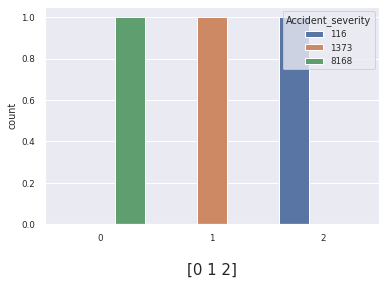

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


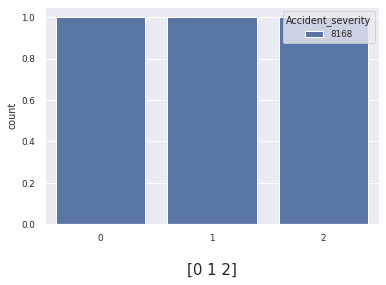

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


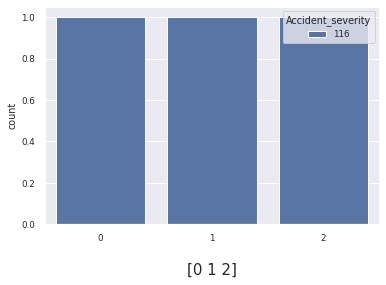

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


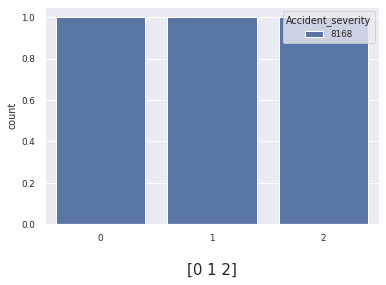

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


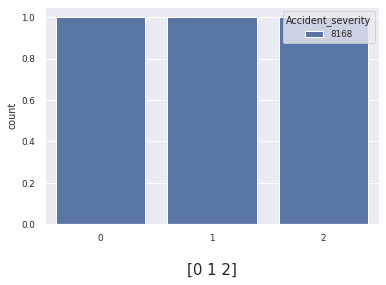

In [ ]:
list=[y_train,y_train_os,y_train_us,y_train_bls,y_train_ros]
for k in list :
    sns.countplot(x=k.unique(),hue=k.value_counts(dropna=False))
    plt.xlabel(k.unique(), fontsize=15, labelpad=20)
    plt.show()

## I. Over Sampling

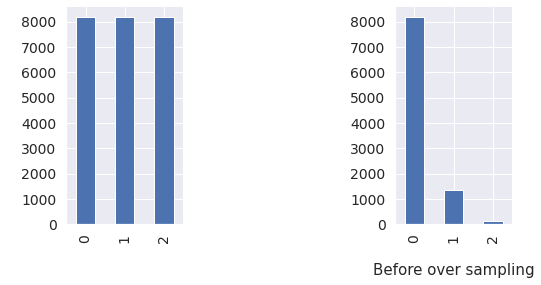

In [ ]:
# checking the ytrain before data balancing
plt.figure(figsize=(18,17))
# barplot
ax1 = plt.subplot(1,2,1)
cp = y_train_os.value_counts(dropna=False).plot.bar(figsize=(8,4))
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
plt.xlabel('After over sampling', fontsize=15, labelpad=20)

# checking ytrain after databalancing
ax2 = plt.subplot(1,2,2)
cp = y_train.value_counts(dropna=False).plot.bar(figsize=(8,4))
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)


plt.xlabel('Before over sampling', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=1.8)
plt.show()

In [ ]:

print('The accuracy scores of different models after Over Sampling')


lst = []

for i in(lr,rfc,dtc,knn,gbc,etc):
    i.fit(x_train_os, y_train_os)

    i_pred_os = i.predict(x_test)

    i_acc_os = round(accuracy_score(y_test, i_pred_os), 4)*100
    i_f1_os=f1_score(y_test, i_pred_os, average='weighted')*100

    lst.append(i_acc_os)


    print(i,'-after Over sampling:','\n')
    print('                      Accuracy:',i_acc_os,'\n')
    print('                      f1 score:',i_f1_os,'\n')

    print('-'*60)


  


The accuracy scores of different models after Over Sampling


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() -after Over sampling: 

                      Accuracy: 56.69 

                      f1 score: 64.40174199938117 

------------------------------------------------------------
RandomForestClassifier() -after Over sampling: 

                      Accuracy: 74.91 

                      f1 score: 75.07203469339147 

------------------------------------------------------------
DecisionTreeClassifier() -after Over sampling: 

                      Accuracy: 64.8 

                      f1 score: 69.06213248857561 

------------------------------------------------------------
KNeighborsClassifier(n_neighbors=11) -after Over sampling: 

                      Accuracy: 54.910000000000004 

                      f1 score: 62.08585913874754 

------------------------------------------------------------
GradientBoostingClassifier(learning_rate=0.45, random_state=0) -after Over sampling: 

                      Accuracy: 65.96 

                      f1 score: 69.8600071925

##II. Under Sampling

In [ ]:
 

# upsampling using nearmiss

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

undersample = NearMiss()
x_train_us, y_train_us = undersample.fit_resample(x_train, y_train)

counter = Counter(y_train_us)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train_us)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", x_train_us.shape, y_train_us.shape)

Class= 0, n=8168 (84.58%)
Class= 1, n=1373 (14.22%)
Class= 2, n=116 (1.20%)
Class= 0, n=116 (33.33%)
Class= 1, n=116 (33.33%)
Class= 2, n=116 (33.33%)
Upsampled data shape:  (348, 13) (348,)


In [ ]:
print('The accuracy scores of different models after Under Sampling')

lst = []

for i in(lr,rfc,dtc,knn,gbc,etc):
    i.fit(x_train_us, y_train_us)

    i_pred_us = i.predict(x_test)

    i_acc_us = round(accuracy_score(y_test, i_pred_us), 8)*100
    i_f1_us=f1_score(y_test, i_pred_us, average='weighted')*100

    lst.append(i_acc_us)


    print(i,'-after Under sampling:','\n')
    print('                      Accuracy:',i_acc_us,'\n')
    print('                      f1 score:',i_f1_us,'\n')

    print('-'*60)


The accuracy scores of different models after Under Sampling
LogisticRegression() -after Under sampling: 

                      Accuracy: 19.171843 

                      f1 score: 26.9597993318797 

------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier() -after Under sampling: 

                      Accuracy: 11.718427 

                      f1 score: 15.178162933580136 

------------------------------------------------------------
DecisionTreeClassifier() -after Under sampling: 

                      Accuracy: 15.320911 

                      f1 score: 20.782110933613406 

------------------------------------------------------------
KNeighborsClassifier(n_neighbors=11) -after Under sampling: 

                      Accuracy: 30.020704 

                      f1 score: 38.12791097557899 

------------------------------------------------------------
GradientBoostingClassifier(learning_rate=0.45, random_state=0) -after Under sampling: 

                      Accuracy: 10.351967 

                      f1 score: 12.926990578240583 

------------------------------------------------------------
ExtraTreesClassifier() -after Under sampling: 

                      Accuracy: 11.511387 

                      f1 sc

##III. Border line SMOTE

In [ ]:
print('The accuracy scores of different models after Borderline Sampling')

lst = []

for i in(lr,rfc,dtc,knn,gbc,etc):
    i.fit(x_train_bls, y_train_bls)

    i_pred_bls = i.predict(x_test)

    i_acc_bls = round(accuracy_score(y_test, i_pred_bls), 8)*100
    i_f1_bls=f1_score(y_test, i_pred_bls, average='weighted')*100

    lst.append(i_acc_bls)


    print(i,'-after Borderline sampling:','\n')
    print('                      Accuracy:',i_acc_bls,'\n')
    print('                      f1 score:',i_f1_bls,'\n')

    print('-'*60)





The accuracy scores of different models after Borderline Sampling


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() -after Borderline sampling: 

                      Accuracy: 51.511387 

                      f1 score: 60.6485109574057 

------------------------------------------------------------
RandomForestClassifier() -after Borderline sampling: 

                      Accuracy: 76.3147 

                      f1 score: 75.46398111874825 

------------------------------------------------------------
DecisionTreeClassifier() -after Borderline sampling: 

                      Accuracy: 67.826087 

                      f1 score: 70.67166201468574 

------------------------------------------------------------
KNeighborsClassifier(n_neighbors=11) -after Borderline sampling: 

                      Accuracy: 61.449275 

                      f1 score: 66.69981656843103 

------------------------------------------------------------
GradientBoostingClassifier(learning_rate=0.45, random_state=0) -after Borderline sampling: 

                      Accuracy: 67.908903 

          

##IV. Random over Sampler 

In [ ]:
print('The accuracy scores of different models after RandomOver Sampling')

lst = []

for i in(lr,rfc,dtc,knn,gbc,etc):
    i.fit(x_train_ros, y_train_ros)

    i_pred_ros = i.predict(x_test)

    i_acc_ros = round(accuracy_score(y_test, i_pred_ros), 8)*100
    i_f1_ros=f1_score(y_test, i_pred_ros, average='weighted')*100

    lst.append(i_acc_ros)


    print(i,'-after RandomOver sampling:','\n')
    print('                      Accuracy:',i_acc_ros,'\n')
    print('                      f1 score:',i_f1_ros,'\n')

    print('-'*60)




The accuracy scores of different models after RandomOver Sampling


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() -after RandomOver sampling: 

                      Accuracy: 41.159420000000004 

                      f1 score: 52.259457765668614 

------------------------------------------------------------
RandomForestClassifier() -after RandomOver sampling: 

                      Accuracy: 81.614907 

                      f1 score: 77.69968941121726 

------------------------------------------------------------
DecisionTreeClassifier() -after RandomOver sampling: 

                      Accuracy: 72.6294 

                      f1 score: 73.32663946600515 

------------------------------------------------------------
KNeighborsClassifier(n_neighbors=11) -after RandomOver sampling: 

                      Accuracy: 57.267081 

                      f1 score: 63.65961505113543 

------------------------------------------------------------
GradientBoostingClassifier(learning_rate=0.45, random_state=0) -after RandomOver sampling: 

                      Accuracy: 55.77639800

#**Fold and Tuning**

###StratifiedK-Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
fold = StratifiedKFold(n_splits = 2)
def get_score_from_model(model,xtrain,xtest,ytrain,ytest):
    model.fit(xtrain,ytrain)
    return model.score(xtest,ytest)

logistic_scores = []
rf_scores = []
SVC_scores = []
for train_index,test_index in fold.split(x,y):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
    
    logistic_scores.append(get_score_from_model(LogisticRegression(),xtrain,xtest,ytrain,ytest))
    rf_scores.append(get_score_from_model(RandomForestClassifier(),xtrain,xtest,ytrain,ytest))
    SVC_scores.append(get_score_from_model(SVC(),xtrain,xtest,ytrain,ytest))    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print(logistic_scores)
print(rf_scores)
print(SVC_scores)

[0.8488612836438924, 0.8488612836438924]
[0.8376811594202899, 0.8364389233954451]
[0.8488612836438924, 0.8488612836438924]


### Cross _ val _ Score

In [ ]:
from sklearn.model_selection import cross_val_score
L_scores = cross_val_score(LogisticRegression(),x,y)
rf_scores = cross_val_score(RandomForestClassifier(),x,y)
svc_scores = cross_val_score(SVC(),x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
print(L_scores)
print(rf_scores)
print(svc_scores)

[0.84637681 0.84637681 0.84672742 0.84631317 0.84631317]
[0.83436853 0.82898551 0.83264292 0.83968517 0.83554267]
[0.84637681 0.84637681 0.84672742 0.84631317 0.84631317]


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

svc_model = SVC()
gds = GridSearchCV(svc_model,{
    "gamma" : [5,1,10,20], "C" :[1,5,10,20],

    "kernel" :["linear","rbf","poly"]},cv = 5,return_train_score = True)


In [ ]:
#gds.fit(xtrain,ytrain)
#gds.cv_results_
#data = pd.DataFrame(gds.cv_results_)
#data

In [ ]:
#print(gds)

In [ ]:
#gds.best_params_     #find the best Parameter

### Find Best Models with different hyperparameters

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model_params = {
    "svm" : {"model" : svm.SVC(gamma = "auto"), "params" : {"C" : [1,10,20], "kernel" : ["linear","rbf"]}},
    "random_forest" : {"model" : RandomForestClassifier(), "params" : {"n_estimators" : [11,5,10]}},
    "logistic_regression" : {"model" : LogisticRegression(), "params" : {"C" : [1,5,10]}}
}

#if "auto" uses 1/n_features.

scores = []
models = ["svm","random_forest","logistic_regression"]
for model_name in models:
    mp = model_params[model_name]
    gds = GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score = True)
    gds.fit(x,y)
    scores.append({"model":model_name,"best_score":gds.best_score_,"best_params":gds.best_params_})

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
df = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
df

,model,best_score,best_params
0,svm,0.846421,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.825630,{'n_estimators': 10}
2,logistic_regression,0.846421,{'C': 1}


In [ ]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(xtrain, ytrain)

# A parameter grid for XGBoost
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    cv=gkf,
)

extree_model = gsearch.fit(xtrain, ytrain)
(gsearch.best_params_, gsearch.best_score_)


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.7754098903129581)

In [ ]:
models={"LogisticRegression":LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "SVM":SVC(),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "GNB":GaussianNB(),
       "RandomForestClassifier":RandomForestClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        }


# models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    #train/Test
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        #pipeline
        #1.Transformer -> 2.Model
        if(scaleFlag==1):
            model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
             model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #training/testing on model pipeline
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result


def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)    

In [ ]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [ ]:
def bestParams(model,param,xtrain,ytrain):
    #cv
    cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3)
    grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=cv,scoring="f1_weighted")
    res=grid_cv.fit(xtrain,ytrain)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

acc=modelAccuracy(models,x,y,1)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Accuracy for  LogisticRegression  is : 0.8525879917184265
The Accuracy for  DecisionTreeClassifier  is : 0.7283643892339544
The Accuracy for  SVM  is : 0.8525879917184265
The Accuracy for  KNeighborsClassifier  is : 0.8385093167701864
The Accuracy for  GNB  is : 0.8501035196687371
The Accuracy for  RandomForestClassifier  is : 0.8422360248447205
The Accuracy for  GradientBoostingClassifier  is : 0.8530020703933747


In [ ]:
bestModel(acc)

Best Model is  GradientBoostingClassifier  with accuaracy => 0.8530020703933747


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
model=RandomForestClassifier()
params={"n_estimators" : [100,200],
        "criterion" : ["gini","entropy"]
        }
bestParams(model,params,xtrain,ytrain)

Best Parameters are  {'criterion': 'gini', 'n_estimators': 200}
Best Accuracy is  0.7779636011476733


In [ ]:
#retrain the model with best parameters
model=RandomForestClassifier(criterion="entropy",n_estimators=200)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [ ]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, xtrain, ytrain, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8436853  0.84575569 0.84886128 0.8447205  0.84782609 0.84782609
 0.8447205  0.8507772  0.84663212 0.84870466]
Mean: 0.8469509434771881
Standard Deviation: 0.0021222963353787695


In [ ]:
xgboost = XGBClassifier(max_depth=3, learning_rate=0.005, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

xgboost.fit(xtrain, ytrain)
preds = xgboost.predict(xtest)

accuracy = (preds == ytest).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

XGBoost's prediction accuracy WITH optimal hyperparameters is: 84.89


In [ ]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, xtrain, ytrain, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8436853  0.84575569 0.84886128 0.8447205  0.84782609 0.84782609
 0.8447205  0.8507772  0.84663212 0.84870466]
Mean: 0.8469509434771881
Standard Deviation: 0.0021222963353787695


#**Final Evaluation**

In [ ]:
#Checking the accuracy score of different model(before sampling)
DF=pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier','Decision Tree Classifier','KNeighbours Classifier', 'SVM Classifier','Gradient Boosting Classifier','ExtraTree Classifier'],
    'Accuracy': [84.89,83.64,71.93,84.68,84.89,84.27,82.82],
    'f1 score':[77.94,78.10,72.89,77.84,77.94,78.09,77.61]})
DF = DF.sort_values(by='f1 score', ascending=False)
DF = DF.set_index('Model')
DF
DF=pd.DataFrame({
    'Model': ['Logistic', 'Random Forest','Decision Tree','KNeighbours', 'SVC','Gradient Boosting','ExtraTree',
         'Logistic-OS', 'Random Forest-OS','Decision Tree-OS','KNeighbours-OS', 'SVC-OS','Gradient Boosting-OS','ExtraTree-OS',
         'Logistic-US', 'Random Forest-US','Decision Tree-US','KNeighbours-US', 'SVC-US','Gradient Boosting-US','ExtraTree-US',
         'Logistic-ROS', 'Random Forest-ROS','Decision Tree-ROS','KNeighbours-ROS', 'SVC-ROS','Gradient Boosting-ROS','ExtraTree-ROS',
         'Logistic-BLS', 'Random Forest-BLS','Decision Tree-BLS','KNeighbours-BLS', 'SVC-BLS','Gradient Boosting-BLS','ExtraTree-BLS'],
    'Accuracy': [84.89,83.64,71.93,84.68,84.89,84.27,82.82,
                57.06,74.08,64.31,54.37,57.85,65.88,75.64,
                20.0,11.88,12.96,24.84,21.61,9.60,12.04,
                41.07,81.53,72.21,56.89,39.83,55.81,82.98,
                54.36,76.19,66.25,61.36,57.76,68.44,77.01],
    'f1 score':[77.94,78.10,72.89,77.84,77.94,78.09,77.61,
               64.78,74.46,68.63,61.74,65.46,69.94,75.40,
               27.67,15.37,16.54,31.57,29.62,11.85,15.36,
               52.04,77.59,73.14,63.44,51.06,63.24,77.93,
               62.67,75.43,69.91,66.44,65.41,71.58,75.59]})
DF = DF.sort_values(by='f1 score', ascending=False)
DF = DF.set_index('Model')
DF
DF=pd.DataFrame({
    'Model': ['Logistic', 'Random Forest','Decision Tree','KNeighbours', 'SVC','Gradient Boosting','ExtraTree',
         'Logistic-OS', 'Random Forest-OS','Decision Tree-OS','KNeighbours-OS', 'SVC-OS','Gradient Boosting-OS','ExtraTree-OS',
         'Logistic-US', 'Random Forest-US','Decision Tree-US','KNeighbours-US', 'SVC-US','Gradient Boosting-US','ExtraTree-US',
         'Logistic-ROS', 'Random Forest-ROS','Decision Tree-ROS','KNeighbours-ROS', 'SVC-ROS','Gradient Boosting-ROS','ExtraTree-ROS',
         'Logistic-BLS', 'Random Forest-BLS','Decision Tree-BLS','KNeighbours-BLS', 'SVC-BLS','Gradient Boosting-BLS','ExtraTree-BLS'],
    'Accuracy': [84.89,83.64,71.93,84.68,84.89,84.27,82.82,
                57.06,74.08,64.31,54.37,57.85,65.88,75.64,
                20.0,11.88,12.96,24.84,21.61,9.60,12.04,
                41.07,81.53,72.21,56.89,39.83,55.81,82.98,
                54.36,76.19,66.25,61.36,57.76,68.44,77.01],
    'f1 score':[77.94,78.10,72.89,77.84,77.94,78.09,77.61,
               64.78,74.46,68.63,61.74,65.46,69.94,75.40,
               27.67,15.37,16.54,31.57,29.62,11.85,15.36,
               52.04,77.59,73.14,63.44,51.06,63.24,77.93,
               62.67,75.43,69.91,66.44,65.41,71.58,75.59]})


#DF = DF.sort_values(by='f1 score', ascending=False)
DF = DF.set_index('Model')
DF




,Accuracy,f1 score
Model,,
Logistic,84.89,77.94
Random Forest,83.64,78.10
Decision Tree,71.93,72.89
KNeighbours,84.68,77.84
SVC,84.89,77.94
Gradient Boosting,84.27,78.09
ExtraTree,82.82,77.61
Logistic-OS,57.06,64.78
Random Forest-OS,74.08,74.46


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 <a list of 35 Text major ticklabel objects>)

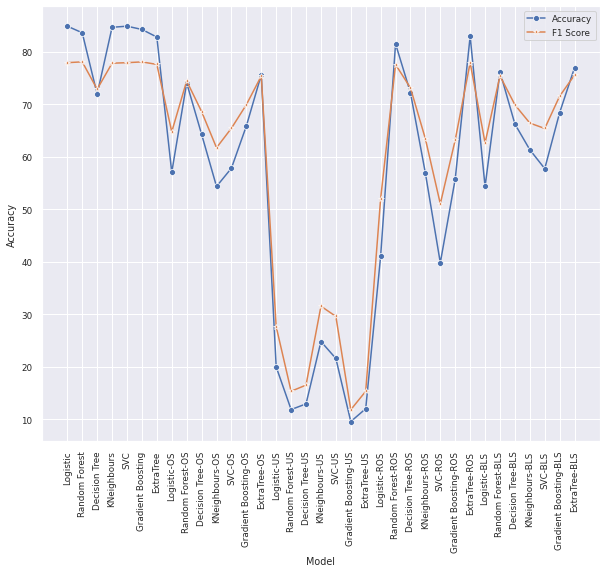

In [ ]:

plt.figure(figsize=(10,8))
sns.lineplot(data=DF,y='Accuracy',x='Model',marker='o',label="Accuracy")
sns.lineplot(data=DF,y='f1 score',x='Model',marker='*',label="F1 Score")
plt.xticks(rotation=90)

## Best Model

Random Forest Claasifier before sampling gives highest f1 score and hence decided to proceed with Extratrees classifier.

In [25]:
model=rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)


0.8376811594202899
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2050
           1       0.23      0.03      0.05       326
           2       0.00      0.00      0.00        39

    accuracy                           0.84      2415
   macro avg       0.36      0.34      0.32      2415
weighted avg       0.75      0.84      0.78      2415



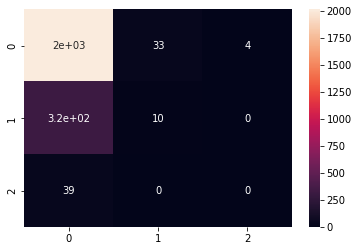

In [26]:


print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

##Pickle file

In [ ]:
import pickle
pickle.dump(model,open("rfc.pkl","wb"))

In [ ]:
print("Done")

Done
